# 1. Acquiring, preprocessing, and analyzing the data

Importing libraries that are necessary for the project:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style = "ticks", color_codes = True)
%pylab inline

Populating the interactive namespace from numpy and matplotlib


First we load in the data and take a look

In [2]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/chess/king-rook-vs-king-pawn/kr-vs-kp.data'
chess = pd.read_csv(url)
chess

,f,f.1,f.2,f.3,f.4,f.5,f.6,f.7,f.8,f.9,...,f.23,f.24,f.25,f.26,f.27,f.28,t.2,t.3,n.1,won
0,f,f,f,f,t,f,f,f,f,f,...,f,f,f,f,f,f,t,t,n,won
1,f,f,f,f,t,f,t,f,f,f,...,f,f,f,f,f,f,t,t,n,won
2,f,f,f,f,f,f,f,f,t,f,...,f,f,f,f,f,f,t,t,n,won
3,f,f,f,f,f,f,f,f,f,f,...,f,f,f,f,f,f,t,t,n,won
4,f,f,f,f,f,f,f,f,f,f,...,f,f,t,f,f,f,t,t,n,won
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3190,t,f,f,f,f,f,t,f,f,f,...,f,t,f,f,t,f,t,f,n,nowin
3191,t,f,f,f,f,f,t,f,f,f,...,f,t,f,f,t,f,t,f,n,nowin
3192,t,f,f,f,f,f,t,f,f,f,...,f,t,f,f,t,f,t,f,n,nowin
3193,t,f,t,f,f,f,t,f,f,f,...,f,t,f,f,t,f,f,f,n,nowin


Note that the dataset is categorical.

Let's do little bit of processing of different variables that might be interesting to look at. First, we look at the datatype of each column:

In [3]:
chess.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3195 entries, 0 to 3194
Data columns (total 37 columns):
f       3195 non-null object
f.1     3195 non-null object
f.2     3195 non-null object
f.3     3195 non-null object
f.4     3195 non-null object
f.5     3195 non-null object
f.6     3195 non-null object
f.7     3195 non-null object
f.8     3195 non-null object
f.9     3195 non-null object
f.10    3195 non-null object
f.11    3195 non-null object
l       3195 non-null object
f.12    3195 non-null object
n       3195 non-null object
f.13    3195 non-null object
f.14    3195 non-null object
t       3195 non-null object
f.15    3195 non-null object
f.16    3195 non-null object
f.17    3195 non-null object
f.18    3195 non-null object
f.19    3195 non-null object
f.20    3195 non-null object
f.21    3195 non-null object
t.1     3195 non-null object
f.22    3195 non-null object
f.23    3195 non-null object
f.24    3195 non-null object
f.25    3195 non-null object
f.26    3195 non-null o

We check how do the entries of columns vary:

In [4]:
chess.shape[1]

37

In [5]:
chess.isin(['f']).sum(axis = 0)[0:1] + 1

f    2839
dtype: int64

In [6]:
for c in range(chess.shape[1]):
    same_features = chess.isin(['f']).sum(axis = 0)[c:c+1] #checking whether all entries of f.1 are f
    print(same_features)
    print('Rate of same features:',same_features/chess.shape[0])

f    2838
dtype: int64
Rate of same features: f    0.888263
dtype: float64
f.1    2970
dtype: int64
Rate of same features: f.1    0.929577
dtype: float64
f.2    3075
dtype: int64
Rate of same features: f.2    0.962441
dtype: float64
f.3    2873
dtype: int64
Rate of same features: f.3    0.899218
dtype: float64
f.4    2128
dtype: int64
Rate of same features: f.4    0.666041
dtype: float64
f.5    1721
dtype: int64
Rate of same features: f.5    0.538654
dtype: float64
f.6    2025
dtype: int64
Rate of same features: f.6    0.633803
dtype: float64
f.7    2499
dtype: int64
Rate of same features: f.7    0.78216
dtype: float64
f.8    1979
dtype: int64
Rate of same features: f.8    0.619405
dtype: float64
f.9    2224
dtype: int64
Rate of same features: f.9    0.696088
dtype: float64
f.10    1816
dtype: int64
Rate of same features: f.10    0.568388
dtype: float64
f.11    2859
dtype: int64
Rate of same features: f.11    0.894836
dtype: float64
l    0
dtype: int64
Rate of same features: l    0.0
d

Note that columns f.1, f.2, f.12, f.13, f.14, f.15, f.19, f.21, f.22, f.23, f.24, f.25 have a significant amount of same entries and thus can be dropped.

In [7]:
chess = chess.drop(['f.1'], axis = 1)
chess = chess.drop(['f.2'], axis = 1)
chess = chess.drop(['f.12'], axis = 1)
chess = chess.drop(['f.13'], axis = 1)
chess = chess.drop(['f.14'], axis = 1)
chess = chess.drop(['f.15'], axis = 1)
chess = chess.drop(['f.19'], axis = 1)
chess = chess.drop(['f.21'], axis = 1)
chess = chess.drop(['f.22'], axis = 1)
chess = chess.drop(['f.23'], axis = 1)
chess = chess.drop(['f.24'], axis = 1)
chess = chess.drop(['f.25'], axis = 1)
chess

,f,f.3,f.4,f.5,f.6,f.7,f.8,f.9,f.10,f.11,...,f.18,f.20,t.1,f.26,f.27,f.28,t.2,t.3,n.1,won
0,f,f,t,f,f,f,f,f,f,f,...,f,f,t,f,f,f,t,t,n,won
1,f,f,t,f,t,f,f,f,f,f,...,f,f,t,f,f,f,t,t,n,won
2,f,f,f,f,f,f,t,f,f,f,...,t,f,t,f,f,f,t,t,n,won
3,f,f,f,f,f,f,f,f,f,f,...,f,t,t,f,f,f,t,t,n,won
4,f,f,f,f,f,f,f,f,f,f,...,f,t,t,f,f,f,t,t,n,won
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3190,t,f,f,f,t,f,f,f,f,t,...,f,t,t,f,t,f,t,f,n,nowin
3191,t,f,f,f,t,f,f,f,f,t,...,f,f,t,f,t,f,t,f,n,nowin
3192,t,f,f,f,t,f,f,f,f,t,...,f,f,t,f,t,f,t,f,n,nowin
3193,t,f,f,f,t,f,f,f,f,t,...,f,t,t,f,t,f,f,f,n,nowin


Checking some other suspicious columns:

In [8]:
same_features = chess.isin(['l']).sum(axis = 0)['l'] #checking how many entries of l are l
print(same_features)
print('Rate of same features in l:',same_features/chess.shape[0])

2204
Rate of same features in l: 0.6898278560250392


In [9]:
same_features = chess.isin(['n']).sum(axis = 0)['n'] #checking how many entries of n are n
print(same_features)
print('Rate of same features in n:',same_features/chess.shape[0])

2525
Rate of same features in n: 0.7902973395931142


In [10]:
same_features = chess.isin(['n']).sum(axis = 0)['n.1'] #checking how many entries of n.1 are n
print(same_features)
print('Rate of same features in n.1:',same_features/chess.shape[0])

2406
Rate of same features in n.1: 0.7530516431924883


Just in case, the datatype inconsistensy is analyzed in a different way as well:

In [11]:
# Detecting dtype inconsistency
print('Columns with data type inconsistensy:')
n_weird_columns = 0
for col in chess.columns:
    weird = (chess[[col]].applymap(type) != chess[[col]].iloc[0].apply(type)).any(axis = 1)
    if len(chess[weird]) > 0:
        print(col)
        n_weird_columns = n_weird_columns + 1
if (n_weird_columns == 0):
    print('None')

Columns with data type inconsistensy:
None


The last column has the 'object' type. It is transformed into numerical values with 0 corresponding to 'nowin' and 1 corresponding to 'won' as follows:

In [12]:
for i in range(len(chess['won'])):
    y_i = chess['won'][i]
    if (y_i == 'nowin'):
        chess['won'][i] = 0
    elif (y_i == 'won'):
        chess['won'][i] = 1

chess = chess.astype({'won': 'int64'})
chess.head()

,f,f.3,f.4,f.5,f.6,f.7,f.8,f.9,f.10,f.11,...,f.18,f.20,t.1,f.26,f.27,f.28,t.2,t.3,n.1,won
0,f,f,t,f,f,f,f,f,f,f,...,f,f,t,f,f,f,t,t,n,1
1,f,f,t,f,t,f,f,f,f,f,...,f,f,t,f,f,f,t,t,n,1
2,f,f,f,f,f,f,t,f,f,f,...,t,f,t,f,f,f,t,t,n,1
3,f,f,f,f,f,f,f,f,f,f,...,f,t,t,f,f,f,t,t,n,1
4,f,f,f,f,f,f,f,f,f,f,...,f,t,t,f,f,f,t,t,n,1


In [13]:
chess.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3195 entries, 0 to 3194
Data columns (total 25 columns):
f       3195 non-null object
f.3     3195 non-null object
f.4     3195 non-null object
f.5     3195 non-null object
f.6     3195 non-null object
f.7     3195 non-null object
f.8     3195 non-null object
f.9     3195 non-null object
f.10    3195 non-null object
f.11    3195 non-null object
l       3195 non-null object
n       3195 non-null object
t       3195 non-null object
f.16    3195 non-null object
f.17    3195 non-null object
f.18    3195 non-null object
f.20    3195 non-null object
t.1     3195 non-null object
f.26    3195 non-null object
f.27    3195 non-null object
f.28    3195 non-null object
t.2     3195 non-null object
t.3     3195 non-null object
n.1     3195 non-null object
won     3195 non-null int64
dtypes: int64(1), object(24)
memory usage: 624.1+ KB


We make a numerical copy of the dataset for future:

In [14]:
chess_num = chess.replace({'f': 0}, regex = True)
chess_num = chess_num.replace({'t': 1}, regex = True)
chess_num = chess_num.replace({'n': 2}, regex = True)
chess_num = chess_num.replace({'w': 3}, regex = True)
chess_num = chess_num.replace({'b': 4}, regex = True)
chess_num = chess_num.replace({'l': 5}, regex = True)
chess_num = chess_num.replace({'g': 6}, regex = True)
#chess_num = chess_num.astype('int64')
chess_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3195 entries, 0 to 3194
Data columns (total 25 columns):
f       3195 non-null int64
f.3     3195 non-null int64
f.4     3195 non-null int64
f.5     3195 non-null int64
f.6     3195 non-null int64
f.7     3195 non-null int64
f.8     3195 non-null int64
f.9     3195 non-null int64
f.10    3195 non-null int64
f.11    3195 non-null int64
l       3195 non-null int64
n       3195 non-null int64
t       3195 non-null int64
f.16    3195 non-null int64
f.17    3195 non-null int64
f.18    3195 non-null int64
f.20    3195 non-null int64
t.1     3195 non-null int64
f.26    3195 non-null int64
f.27    3195 non-null int64
f.28    3195 non-null int64
t.2     3195 non-null int64
t.3     3195 non-null int64
n.1     3195 non-null int64
won     3195 non-null int64
dtypes: int64(25)
memory usage: 624.1 KB


Splitting the data into the test and train datasets:

In [15]:
msk = np.random.rand(len(chess)) < 0.8
train = chess[msk]
test = chess[~msk]

train_num = chess_num[msk]
test_num = chess_num[~msk]

print('Train entries: ' + str(len(train)))
print('Test entries: ' + str(len(test)))

Train entries: 2498
Test entries: 697


Checking how much of the train data correspond to win and no win:

In [16]:
X_train = train.iloc[:, :-1] # feature values
y_train = train.iloc[:, -1] # target values

X_train_num = train_num.iloc[:, :-1] # feature values
y_train_num = train_num.iloc[:, -1] # target values

print('Number of won entries: ' + str(train.loc[y_train == 1].shape[0]))
print('Number of nowin entries: ' + str(train.loc[y_train == 0].shape[0]))

Number of won entries: 1309
Number of nowin entries: 1189


We can take a look at the prior probability of 'good' entries:

In [17]:
prior = train.loc[y_train == 1].shape[0] / (train.loc[y_train == 1].shape[0] + train.loc[y_train == 0].shape[0])
prior

0.5240192153722978

We can plot some data to see potential dependencies.

/Users/Nick/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:311: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(nrow, ncol, **kwargs)


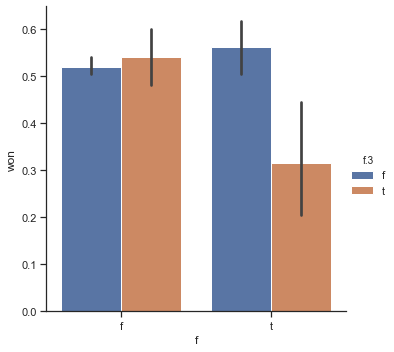

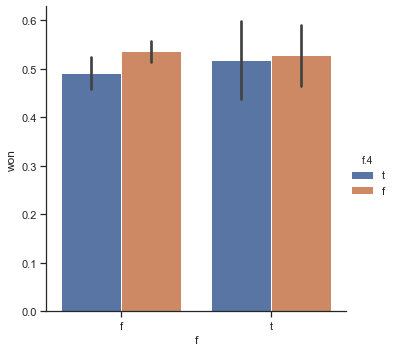

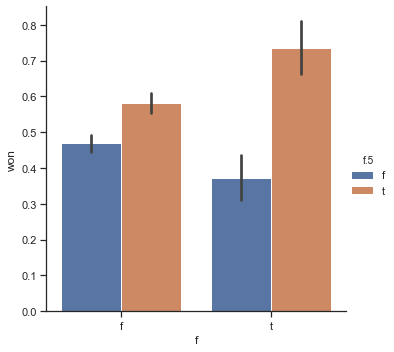

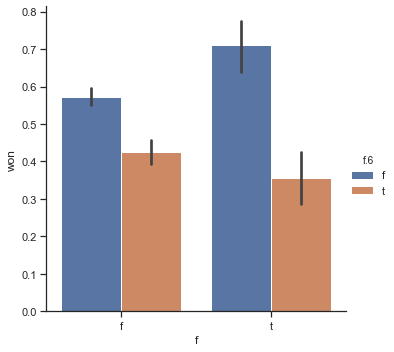

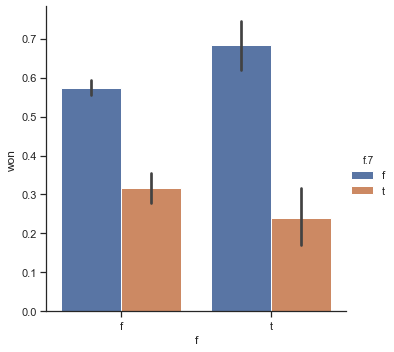

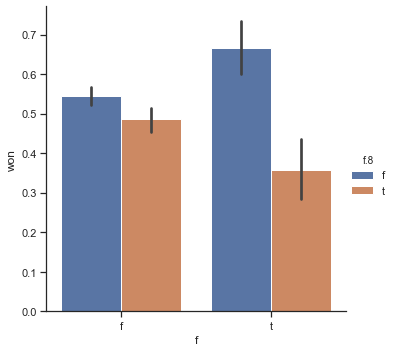

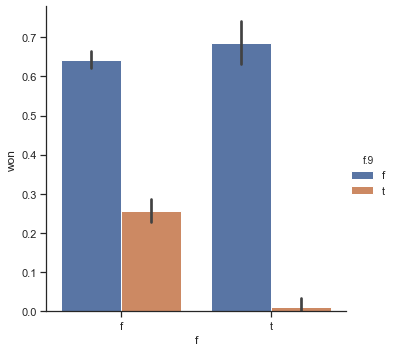

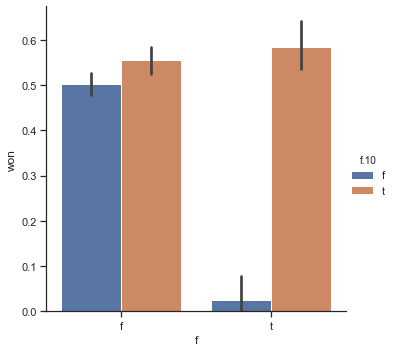

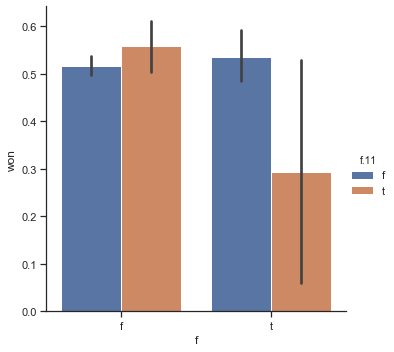

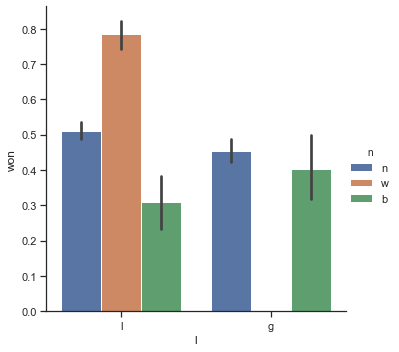

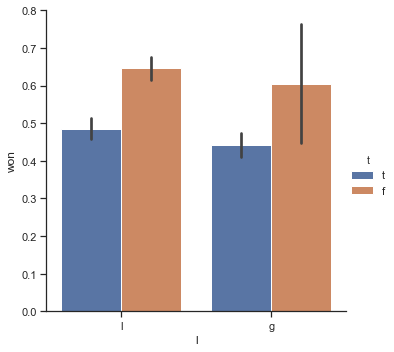

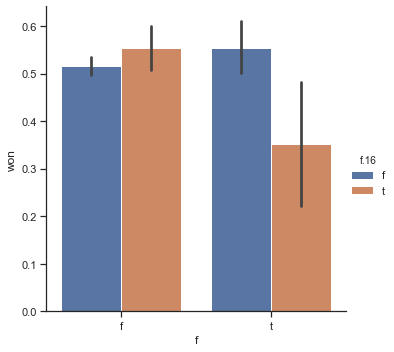

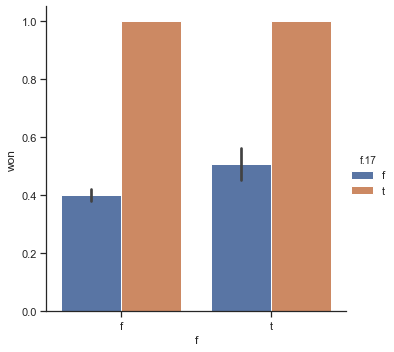

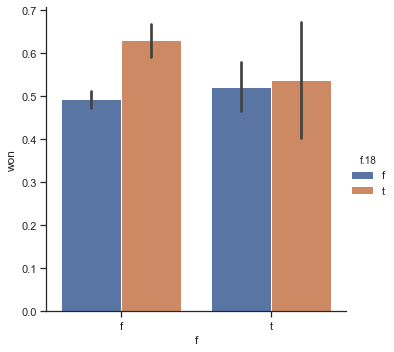

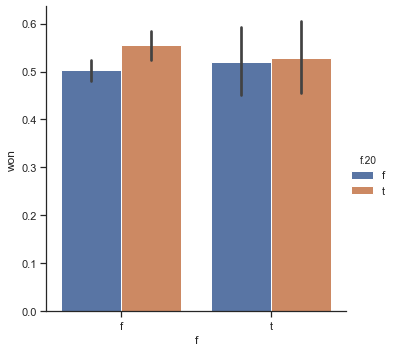

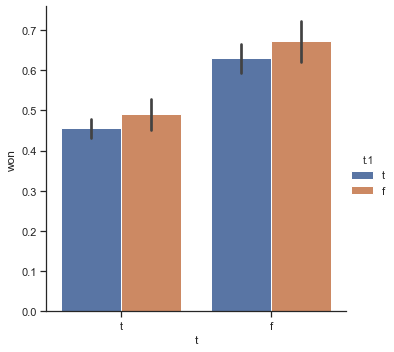

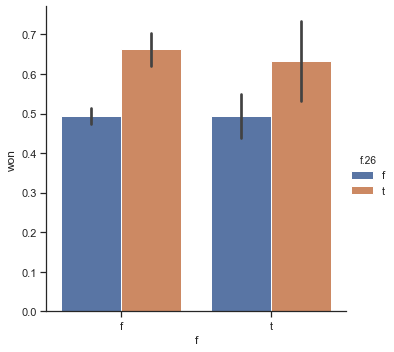

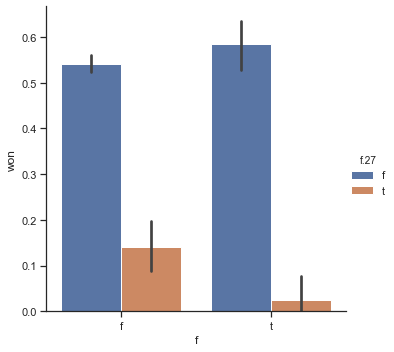

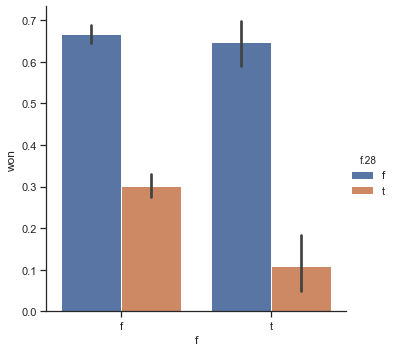

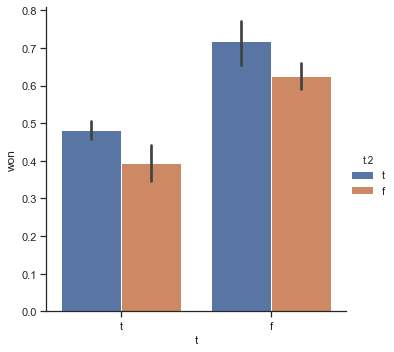

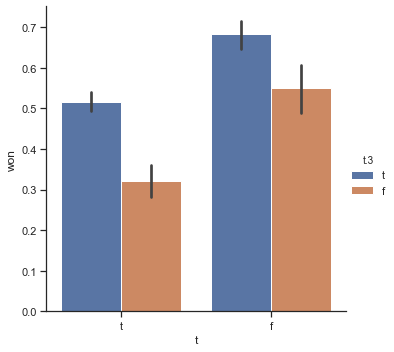

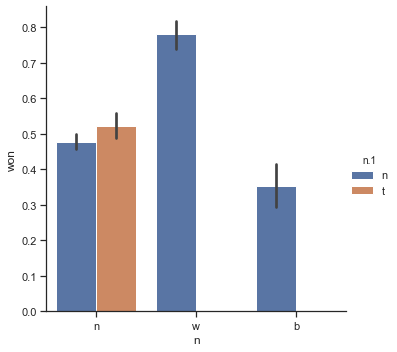

In [18]:
sns.catplot(x = "f", y="won", hue="f.3", kind="bar", data=chess);
sns.catplot(x = "f", y="won", hue="f.4", kind="bar", data=chess);
sns.catplot(x = "f", y="won", hue="f.5", kind="bar", data=chess);
sns.catplot(x = "f", y="won", hue="f.6", kind="bar", data=chess);
sns.catplot(x = "f", y="won", hue="f.7", kind="bar", data=chess);
sns.catplot(x = "f", y="won", hue="f.8", kind="bar", data=chess);
sns.catplot(x = "f", y="won", hue="f.9", kind="bar", data=chess);
sns.catplot(x = "f", y="won", hue="f.10", kind="bar", data=chess);
sns.catplot(x = "f", y="won", hue="f.11", kind="bar", data=chess);

sns.catplot(x = "l", y="won", hue="n", kind="bar", data=chess);
sns.catplot(x = "l", y="won", hue="t", kind="bar", data=chess);

sns.catplot(x = "f", y="won", hue="f.16", kind="bar", data=chess);
sns.catplot(x = "f", y="won", hue="f.17", kind="bar", data=chess);
sns.catplot(x = "f", y="won", hue="f.18", kind="bar", data=chess);
sns.catplot(x = "f", y="won", hue="f.20", kind="bar", data=chess);

sns.catplot(x = "t", y="won", hue="t.1", kind="bar", data=chess);

sns.catplot(x = "f", y="won", hue="f.26", kind="bar", data=chess);
sns.catplot(x = "f", y="won", hue="f.27", kind="bar", data=chess);
sns.catplot(x = "f", y="won", hue="f.28", kind="bar", data=chess);

sns.catplot(x = "t", y="won", hue="t.2", kind="bar", data=chess);
sns.catplot(x = "t", y="won", hue="t.3", kind="bar", data=chess);

sns.catplot(x = "n", y="won", hue="n.1", kind="bar", data=chess);


# 2. Implementing the models

## 2.1. Implementing logistic regression

A class for logistic regression with gradient descent:

In [19]:
class Logistic_Regression:
    def __init__(self,
                 lr = 0.01, #learning rate of the gradient descent method
                 eps = 1e-2, # termination condition of the gradient descent method
                ):
        self.lr = lr
        self.eps = eps
        
    # Implementing the logistic function
    def __logistic_function(self, x):
        return 1/(1 + np.exp(-x))
    
    # Implementing the cost function
    def __cost(self,
               w, # N
               X_train, # N x D
               y_train, # N
              ):
        z = np.dot(X_train, w) # N x 1
        J = np.mean(y_train * np.log1p(np.exp(-z)) + (1 - y_train) * np.log1p(np.exp(z)))
        return J
    
    # Implementing the gradient function
    def __gradient(self,
                   w, # N
                   X_train, # N x D
                   y_train, # N
                  ):
        N = y_train.size
        z = np.dot(X_train, w) # N x 1
        yh = self.__logistic_function(z)
        return np.dot(X_train.T, (yh - y_train)) / N
    
    def __GradientDescent(self,
                          X_train, # N x D
                          y_train, # N
                          lr, #learning rate
                          eps # termination condition is used if n_iterations == 0
                         ):
        #N, D = X.shape
        N = X_train.shape[0]
        
        intercept = np.ones((N, 1))
        X_train = np.concatenate((intercept, X_train), axis=1)
        
        D = X_train.shape[1]
        
        w = np.zeros(D)
        g = np.inf
        
        n_iterations = 0 # just for counting the number of iterations
        while (np.linalg.norm(g) > eps):
            g = self.__gradient(w, X_train, y_train)
            w = w - lr * g

            n_iterations += 1

        print('Number of iterations of the gradient descent:', n_iterations)
        
        return w
    
    # Implementing the fit function
    def fit(self,
            X_train, # N x D
            y_train # N
            ):
        
        w = self.__GradientDescent(X_train, y_train, self.lr, self.eps)
        
        return w
    
    # Implementing the predict function
    def predict (self,
                 X_test,
                 w,
                threshold = 0.5
                ):
        intercept = np.ones((X_test.shape[0], 1))
        X_test = np.concatenate((intercept, X_test), axis=1)

        return self.__logistic_function(np.dot(X_test, w)) >= threshold
    
    # Function for checking the algorithm accuracy
    def evaluate_acc(self,
                    predicted_values,
                    true_values
                    ):
        check = []
        i = 0
        correct = 0
        incorrect = 0
        for y_i in true_values:
            if ((y_i == 1) and (predicted_values[i] == True)):
                check.append([True])
                correct += 1
            elif ((y_i == 0) and (predicted_values[i] == False)):
                check.append([True])
                correct += 1
            else:
                check.append([False])
                incorrect += 1  
            i += 1
        
        accuracy = correct/(correct + incorrect)
        print('Correct classifications:', correct)
        print('Incorrect classifications:', incorrect)
        print('Accuracy of the logistic regression:', correct/(correct + incorrect))
        
        return accuracy

Essentially the same class but instead of the termiantion condition $\epsilon$ the number of iterations $n_{iterations}$ is used

In [20]:
class Logistic_Regression_Iter:
    def __init__(self,
                 lr = 0.01, #learning rate of the gradient descent method
                 n_iterations = 1e-2, # number of iterations of the gradient descent method
                ):
        self.lr = lr
        self.n_iterations = n_iterations
        
    # Implementing the logistic function
    def __logistic_function(self, x):
        return 1/(1 + np.exp(-x))
    
    # Implementing the cost function
    def __cost(self,
               w, # N
               X_train, # N x D
               y_train, # N
              ):
        z = np.dot(X_train, w) # N x 1
        J = np.mean(y_train * np.log1p(np.exp(-z)) + (1 - y_train) * np.log1p(np.exp(z)))
        return J
    
    # Implementing the gradient function
    def __gradient(self,
                   w, # N
                   X_train, # N x D
                   y_train, # N
                  ):
        N = y_train.size
        z = np.dot(X_train, w) # N x 1
        yh = self.__logistic_function(z)
        return np.dot(X_train.T, (yh - y_train)) / N
    
    def __GradientDescent(self,
                          X_train, # N x D
                          y_train, # N
                          lr, #learning rate
                          n_iterations # termination condition
                         ):
        #N, D = X.shape
        N = X_train.shape[0]
        
        intercept = np.ones((N, 1))
        X_train = np.concatenate((intercept, X_train), axis=1)
        
        D = X_train.shape[1]
        
        w = np.zeros(D)
        g = np.inf
        
        n = 0 # just for counting the number of iterations
        while (n_iterations > n):
            g = self.__gradient(w, X_train, y_train)
            w = w - lr * g

            n += 1

        #print('Number of iterations of the gradient descent:', n)
        
        return w
    
    # Implementing the fit function
    def fit(self,
            X_train, # N x D
            y_train # N
            ):
        
        w = self.__GradientDescent(X_train, y_train, self.lr, self.n_iterations)
        
        return w
    
    # Implementing the predict function
    def predict (self,
                 X_test,
                 w,
                threshold = 0.5
                ):
        intercept = np.ones((X_test.shape[0], 1))
        X_test = np.concatenate((intercept, X_test), axis=1)

        return self.__logistic_function(np.dot(X_test, w)) >= threshold
    
    # Function for checking the algorithm accuracy
    def evaluate_acc(self,
                    predicted_values,
                    true_values
                    ):
        check = []
        i = 0
        correct = 0
        incorrect = 0
        for y_i in true_values:
            if ((y_i == 1) and (predicted_values[i] == True)):
                check.append([True])
                correct += 1
            elif ((y_i == 0) and (predicted_values[i] == False)):
                check.append([True])
                correct += 1
            else:
                check.append([False])
                incorrect += 1  
            i += 1
        
        accuracy = correct/(correct + incorrect)
        print('Correct classifications:', correct)
        print('Incorrect classifications:', incorrect)
        print('Accuracy of the logistic regression:', correct/(correct + incorrect))
        
        return accuracy

Setting up the logistic regression:

In [21]:
LR = Logistic_Regression()

Running the fit function:

In [22]:
%time w = LR.fit(X_train_num, y_train_num)
w

Number of iterations of the gradient descent: 41274
CPU times: user 1min 3s, sys: 1.65 s, total: 1min 4s
Wall time: 52.5 s


array([ 0.40026564,  0.5929882 , -0.61620645, -0.25360442,  1.16540721,
        0.0864003 , -0.1925336 , -0.21356538, -4.39412593,  0.35330299,
        0.10649791,  0.01182257,  0.022645  , -0.90955583,  0.020027  ,
        7.81143787, -0.02945676, -0.08173799, -0.38668493,  0.64502461,
       -2.1358835 , -4.00921204,  0.07892428,  1.67336052,  0.18270951])

Separating the feature and the target values in the test dataset:

In [23]:
X_test = test.iloc[:, :-1] # feature values
y_test = test.iloc[:, -1] # target values

X_test_num = test_num.iloc[:, :-1] # feature values
y_test_num = test_num.iloc[:, -1] # target values

Running the predict function:

In [24]:
pred = LR.predict(X_test_num, w)

Checking how much of the test dataset was predicted correctly:

In [25]:
accuracy = LR.evaluate_acc(pred, y_test_num)

Correct classifications: 657
Incorrect classifications: 40
Accuracy of the logistic regression: 0.9426111908177905


## 2.2. Implementing Naïve Bayes

The data is categorical now, unlike the previosly done Ionospere dataset, so the Categorical Naive Bayes is used. 

In [59]:
class CategoricalNaiveBayes:
    def __init__(self):
        pass
    
    # The fit function returns the mean, the standard deviation, and the logariphmic prior probability
    def fit(self,
            X_train, # N x D
            y_train, # N x C
           ):
        
        self.epsilon = 1e-9 * np.var(X_train, ddof = 1, axis = 0).max()
        
        # Get uniques values
        uniques = np.unique(y_train)
        num_classes = uniques.size
        (num_samples, num_features) = X_train.shape

        # Correct the inputs
        priors = np.bincount(y_train)/num_samples

        self.categorical_features = np.arange(0, num_features)

        # Get the index columns of the discrete data and continuous data
        self.categorical_features = np.array(self.categorical_features).astype(int)
        #self.gaussian_features = np.delete(np.arange(num_features), self.categorical_features)

        # How many categories are there in each categorical_feature
        # Add 1 due to zero-indexing
        max_categories = np.max(X_train.to_numpy()[:, self.categorical_features], axis = 0) + 1
        max_categories = max_categories.astype(int)

        # Prepare empty arrays
        self.categorical_posteriors = [np.zeros((num_classes, num_categories)) 
                                       for num_categories in max_categories]

        for y_i in uniques:
            for i, categorical_feature in enumerate(self.categorical_features):
                    dist = np.bincount(
                            X_train.to_numpy()[y_train == y_i, :][:, categorical_feature].astype(int),
                            minlength = max_categories[i]) + 0.5
                    self.categorical_posteriors[i][y_i, :] = dist / np.sum(dist)

        return priors
    
    
    def predict(self,
                X_test,
                priors
               ):
        
        X_test = np.array(X_test)

        # Cast tensor to int
        X = X_test[:, self.categorical_features].astype(int)

        # A list of length=num_features.
        # Each item in the list contains the distributions for the y_classes
        # Shape of each item is (num_classes,1,num_samples)
        preds = [categorical_posterior[:, X[:, i][:, np.newaxis]]
                  for i, categorical_posterior in enumerate(self.categorical_posteriors)]

        r = np.concatenate([preds], axis = 0)
        r = np.squeeze(r, axis = -1)
        r = np.moveaxis(r, [0, 1, 2], [2, 0, 1])

        p = np.prod(r, axis = 2).T

        finals = p * priors

        pred = finals.T/(np.sum(finals, axis = 1) + 1e-6)
        pred = np.moveaxis(pred, [0, 1], [1, 0])
        
        
        return np.argmax(pred, axis = 1) #N_test x C
    
    # Function for checking the algorithm accuracy
    def evaluate_acc(self,
                    predicted_values,
                    true_values
                    ):
        check = []
        i = 0 # a counter for retreiving information from predicted target values
        correct = 0
        incorrect = 0
        for y_i in true_values:
            if ((y_i == 1) and (predicted_values[i] == 1)):
                check.append([True])
                correct += 1
            elif ((y_i == 0) and (predicted_values[i] == 0)):
                check.append([True])
                correct += 1
            else:
                check.append([False])
                incorrect += 1  
            i += 1

        accuracy = correct/(correct + incorrect)
        print('Correct classifications:', correct)
        print('Incorrect classifications:', incorrect)
        print('Accuracy of the naive Bayes:', correct/(correct + incorrect))
        
        return accuracy

In [30]:
CNB = CategoricalNaiveBayes()

In [31]:
priors = CNB.fit(X_train_num, y_train_num)
priors

array([0.47598078, 0.52401922])

In [33]:
pred = CNB.predict(X_test_num, priors)
pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [34]:
accuracy = CNB.evaluate_acc(pred, y_test_num)

Correct classifications: 619
Incorrect classifications: 78
Accuracy of the naive Bayes: 0.8880918220946915


## 2.3. Implementing $k$-fold cross-validation

$k$-fold cross-validation of linear regression with $\epsilon$ as a termination criteria

In [95]:
def Linear_Regression_k_Fold_Cross_Validation(dataset, # the initial dataset
                                              k, # number of folds
                                              lr = 0.01, #learning rate of the gradient descent method
                                              eps = 1e-2, # termination condition of the gradient descent method
                                             ):
    print('Logistic regression:')
    
    logistic_regression_accuracy = []
    
    # Splitting the dataset into folds: 
    folds = np.array_split(dataset, k)
    
    for i in range(k):
        print('Fold', i + 1)
        test = folds[i] # the test dataset is the i-th fold
        
        train = folds.copy() # consider the train dataset to be a copy of all folds
        del train[i] # removing the i-th fold
        train = pd.concat(train, sort = False)
        
        # Train dataset:
        X_train = train.iloc[:, :-1] # feature values
        y_train = train.iloc[:, -1] # target values
        
        # Test dataset:
        X_test = test.iloc[:, :-1] # feature values
        y_test = test.iloc[:, -1] # target values
        
        # Logistic regression
        
        LR = Logistic_Regression(lr = lr)
        w = LR.fit(X_train, y_train)
        pred = LR.predict(X_test, w)
        logistic_regression_accuracy.append(LR.evaluate_acc(pred, y_test))
        
        print('----------------------------------------')
        
    mu_LR = np.mean(logistic_regression_accuracy)
    std_LR = np.std(logistic_regression_accuracy)
    
    
    print('Logistic regression mean:', mu_LR)
    print('Logistic regression standard deviation:', std_LR)
    
    return mu_LR, std_LR

$k$-fold cross-validation of linear regression with $n_{iterations}$ as a termination criteria

In [96]:
def Linear_Regression_Iter_k_Fold_Cross_Validation(dataset, # the initial dataset
                                              k, # number of folds
                                              lr = 0.01, #learning rate of the gradient descent method
                                              n_iterations = 300 #number of iterations
                                             ):
    print('Logistic regression:')
    
    logistic_regression_accuracy = []
    
    # Splitting the dataset into folds: 
    folds = np.array_split(dataset, k)
    
    for i in range(k):
        print('Fold', i + 1)
        test = folds[i] # the test dataset is the i-th fold
        
        train = folds.copy() # consider the train dataset to be a copy of all folds
        del train[i] # removing the i-th fold
        train = pd.concat(train, sort = False)
        
        # Train dataset:
        X_train = train.iloc[:, :-1] # feature values
        y_train = train.iloc[:, -1] # target values
        
        # Test dataset:
        X_test = test.iloc[:, :-1] # feature values
        y_test = test.iloc[:, -1] # target values
        
        # Logistic regression
        
        LR = Logistic_Regression_Iter(lr = lr, n_iterations = n_iterations)
        w = LR.fit(X_train, y_train)
        pred = LR.predict(X_test, w)
        logistic_regression_accuracy.append(LR.evaluate_acc(pred, y_test))
        
        print('----------------------------------------')
        
    mu_LR = np.mean(logistic_regression_accuracy)
    std_LR = np.std(logistic_regression_accuracy)
    
    
    print('Logistic regression mean:', mu_LR)
    print('Logistic regression standard deviation:', std_LR)
    
    return mu_LR, std_LR

$k$-fold cross-validation of Categorical Naive Bayes

In [37]:
def Naive_Bayes_k_Fold_Cross_Validation(dataset, # the initial dataset
                                        k # number of folds
                                       ):
    print('Naive Bayes')
    naive_bayes_accuracy = []
    
    # Splitting the dataset into folds: 
    folds = np.array_split(dataset, k)
    
    for i in range(k):
        print('Fold', i + 1)
        test = folds[i] # the test dataset is the i-th fold
        
        train = folds.copy() # consider the train dataset to be a copy of all folds
        del train[i] # removing the i-th fold
        train = pd.concat(train, sort = False)
        
        # Train dataset:
        X_train = train.iloc[:, :-1] # feature values
        y_train = train.iloc[:, -1] # target values
        
        # Test dataset:
        X_test = test.iloc[:, :-1] # feature values
        y_test = test.iloc[:, -1] # target values
        
        # Naive Bayes
        print('Naive Bayes')
        CNB = CategoricalNaiveBayes()
        priors = CNB.fit(X_train_num, y_train_num)
        pred = CNB.predict(X_test_num, priors)
        naive_bayes_accuracy.append(CNB.evaluate_acc(pred, y_test))
        print('----------------------------------------')
    
    mu_NB = np.mean(naive_bayes_accuracy)
    std_NB = np.std(naive_bayes_accuracy)
    
    print('Naive Bayes mean:', mu_NB)
    print('Naive Bayes standard deviation:', std_NB)
    
    return mu_NB, std_NB

# 3. Running the experiments

## 3.1. $k$-fold cross-validation test

First we run $k$-fold cross-validation for logistic regresstion with $k=5$: 

In [100]:
%time mu_LR, std_LR = Linear_Regression_k_Fold_Cross_Validation(chess_num, k = 5, lr = 0.01, eps = 1e-2)

Logistic regression:
Fold 1
Number of iterations of the gradient descent: 37834
Correct classifications: 405
Incorrect classifications: 234
Accuracy of the logistic regression: 0.6338028169014085
----------------------------------------
Fold 2
Number of iterations of the gradient descent: 44062
Correct classifications: 543
Incorrect classifications: 96
Accuracy of the logistic regression: 0.8497652582159625
----------------------------------------
Fold 3
Number of iterations of the gradient descent: 39992
Correct classifications: 544
Incorrect classifications: 95
Accuracy of the logistic regression: 0.8513302034428795
----------------------------------------
Fold 4
Number of iterations of the gradient descent: 34474
Correct classifications: 539
Incorrect classifications: 100
Accuracy of the logistic regression: 0.8435054773082942
----------------------------------------
Fold 5
Number of iterations of the gradient descent: 38737
Correct classifications: 408
Incorrect classifications: 23

We do the same for Categorical Naive Bayes:

In [38]:
%time mu_NB, std_NB = Naive_Bayes_k_Fold_Cross_Validation(chess_num, 5)

Naive Bayes
Fold 1
Naive Bayes
Correct classifications: 351
Incorrect classifications: 288
Accuracy of the naive Bayes: 0.5492957746478874
----------------------------------------
Fold 2
Naive Bayes
Correct classifications: 402
Incorrect classifications: 237
Accuracy of the naive Bayes: 0.6291079812206573
----------------------------------------
Fold 3
Naive Bayes
Correct classifications: 288
Incorrect classifications: 351
Accuracy of the naive Bayes: 0.4507042253521127
----------------------------------------
Fold 4
Naive Bayes
Correct classifications: 383
Incorrect classifications: 256
Accuracy of the naive Bayes: 0.5993740219092332
----------------------------------------
Fold 5
Naive Bayes
Correct classifications: 288
Incorrect classifications: 351
Accuracy of the naive Bayes: 0.4507042253521127
----------------------------------------
Naive Bayes mean: 0.5358372456964007
Naive Bayes standard deviation: 0.07404423859312119
CPU times: user 253 ms, sys: 17.9 ms, total: 271 ms
Wall ti

Note that accuracy of the logistic regression is higher than of naive Bayes which comes at a cost of slower computation.

## 3.2. Tet of different learning rates for the gradient descent

Here we test learning rates $10^{-3}, 10^{-2}, 10^{-1}, 10^{0}, 10^{1}$ while keeping the termination criteria $\epsilon = 0.01$ the same. Note that for the learning rate greater than $10$ the gradient descent overshoots and does not converge and for the learning rate lower than $10^{-3}$ the computation is too slow and seems like an overkill. 

In [104]:
learning_rates = []
stds = []
mus = []
times = []

for i in range(-1, 4):
    learning_rates.append(10**-i)
    print('Learning rate:',10**-i)
    
    start_time = time.time()
    mu_LR, std_LR = Linear_Regression_k_Fold_Cross_Validation(chess_num, 5, lr = learning_rates[i])
    time_ellapsed = time.time() - start_time
    
    print('Time ellapsed:', time_ellapsed)
    times.append(time_ellapsed)
    
    mus.append(mu_LR)
    stds.append(std_LR)

Learning rate: 10
Logistic regression:
Fold 1
Number of iterations of the gradient descent: 313
Correct classifications: 465
Incorrect classifications: 174
Accuracy of the logistic regression: 0.7276995305164319
----------------------------------------
Fold 2
Number of iterations of the gradient descent: 679
Correct classifications: 526
Incorrect classifications: 113
Accuracy of the logistic regression: 0.8231611893583725
----------------------------------------
Fold 3
Number of iterations of the gradient descent: 785
Correct classifications: 555
Incorrect classifications: 84
Accuracy of the logistic regression: 0.8685446009389671
----------------------------------------
Fold 4
Number of iterations of the gradient descent: 2664
Correct classifications: 616
Incorrect classifications: 23
Accuracy of the logistic regression: 0.9640062597809077
----------------------------------------
Fold 5
Number of iterations of the gradient descent: 326
Correct classifications: 425
Incorrect classifica

We can obtain error as $error = 1 - \mu$.

In [107]:
error = []
for m in mus:
    error.append(1 - m)

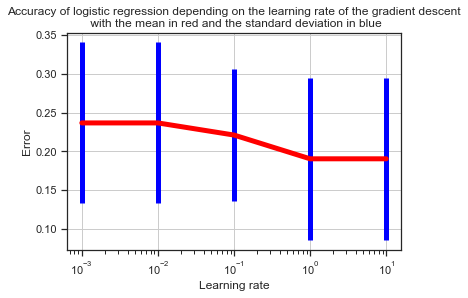

In [108]:
#plt.plot(n_iterations, mus)
plt.xlabel('Learning rate')
plt.ylabel('Error')
plt.xscale(value = 'log')
plt.errorbar(learning_rates, error, stds, color = 'red', ecolor = 'blue', linewidth = 5)
plt.grid()
plt.title('Accuracy of logistic regression depending on the learning rate of the gradient descent\n with the mean in red and the standard deviation in blue')
plt.show()

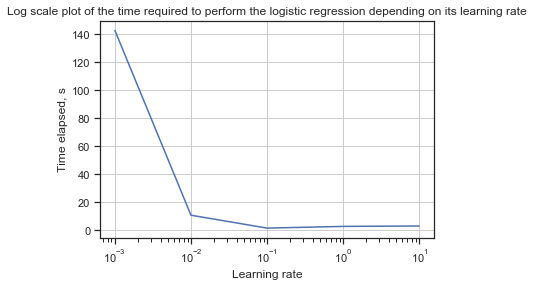

In [109]:
plt.plot(learning_rates, times)
plt.xlabel('Learning rate')
plt.ylabel('Time elapsed, s')
plt.xscale(value = 'log')
plt.grid()
plt.title('Log scale plot of the time required to perform the logistic regression depending on its learning rate')
plt.show()

We see that the accuracy improves with higher learning rate but setting the learning rate closer to zero results in a significant increase of time.

Now we check how does the accuracy depends of the number of iteratins of the gradient descent method used in logistic regression. We set the maximum $n_{iterations}=10^3$.

In [110]:
stds = []
mus = []
times = []

n_iterations = range(1, 1000)

for n in n_iterations:
    print('n_iterations =', n)
    start_time = time.time()
    mu_LR, std_LR = Linear_Regression_Iter_k_Fold_Cross_Validation(chess_num,
                                                              k = 5,
                                                              n_iterations = n)
    time_ellapsed = time.time() - start_time
    
    print('Time ellapsed:', time_ellapsed)
    times.append(time_ellapsed)
    
    mus.append(mu_LR)
    stds.append(std_LR)
    
    print('----------------------------------------')

n_iterations = 1
Logistic regression:
Fold 1
Correct classifications: 0
Incorrect classifications: 639
Accuracy of the logistic regression: 0.0
----------------------------------------
Fold 2
Correct classifications: 264
Incorrect classifications: 375
Accuracy of the logistic regression: 0.4131455399061033
----------------------------------------
Fold 3
Correct classifications: 318
Incorrect classifications: 321
Accuracy of the logistic regression: 0.49765258215962443
----------------------------------------
Fold 4
Correct classifications: 192
Incorrect classifications: 447
Accuracy of the logistic regression: 0.3004694835680751
----------------------------------------
Fold 5
Correct classifications: 0
Incorrect classifications: 639
Accuracy of the logistic regression: 0.0
----------------------------------------
Logistic regression mean: 0.2422535211267606
Logistic regression standard deviation: 0.2074586212903884
Time ellapsed: 0.06950092315673828
------------------------------------

Correct classifications: 318
Incorrect classifications: 321
Accuracy of the logistic regression: 0.49765258215962443
----------------------------------------
Fold 4
Correct classifications: 192
Incorrect classifications: 447
Accuracy of the logistic regression: 0.3004694835680751
----------------------------------------
Fold 5
Correct classifications: 0
Incorrect classifications: 639
Accuracy of the logistic regression: 0.0
----------------------------------------
Logistic regression mean: 0.2422535211267606
Logistic regression standard deviation: 0.2074586212903884
Time ellapsed: 0.08061003684997559
----------------------------------------
n_iterations = 11
Logistic regression:
Fold 1
Correct classifications: 0
Incorrect classifications: 639
Accuracy of the logistic regression: 0.0
----------------------------------------
Fold 2
Correct classifications: 264
Incorrect classifications: 375
Accuracy of the logistic regression: 0.4131455399061033
----------------------------------------
F

Correct classifications: 0
Incorrect classifications: 639
Accuracy of the logistic regression: 0.0
----------------------------------------
Fold 2
Correct classifications: 264
Incorrect classifications: 375
Accuracy of the logistic regression: 0.4131455399061033
----------------------------------------
Fold 3
Correct classifications: 318
Incorrect classifications: 321
Accuracy of the logistic regression: 0.49765258215962443
----------------------------------------
Fold 4
Correct classifications: 192
Incorrect classifications: 447
Accuracy of the logistic regression: 0.3004694835680751
----------------------------------------
Fold 5
Correct classifications: 0
Incorrect classifications: 639
Accuracy of the logistic regression: 0.0
----------------------------------------
Logistic regression mean: 0.2422535211267606
Logistic regression standard deviation: 0.2074586212903884
Time ellapsed: 0.2558901309967041
----------------------------------------
n_iterations = 21
Logistic regression:
Fo

Correct classifications: 0
Incorrect classifications: 639
Accuracy of the logistic regression: 0.0
----------------------------------------
Fold 2
Correct classifications: 264
Incorrect classifications: 375
Accuracy of the logistic regression: 0.4131455399061033
----------------------------------------
Fold 3
Correct classifications: 318
Incorrect classifications: 321
Accuracy of the logistic regression: 0.49765258215962443
----------------------------------------
Fold 4
Correct classifications: 192
Incorrect classifications: 447
Accuracy of the logistic regression: 0.3004694835680751
----------------------------------------
Fold 5
Correct classifications: 0
Incorrect classifications: 639
Accuracy of the logistic regression: 0.0
----------------------------------------
Logistic regression mean: 0.2422535211267606
Logistic regression standard deviation: 0.2074586212903884
Time ellapsed: 0.23859596252441406
----------------------------------------
n_iterations = 30
Logistic regression:
F

Correct classifications: 319
Incorrect classifications: 320
Accuracy of the logistic regression: 0.49921752738654146
----------------------------------------
Fold 4
Correct classifications: 192
Incorrect classifications: 447
Accuracy of the logistic regression: 0.3004694835680751
----------------------------------------
Fold 5
Correct classifications: 0
Incorrect classifications: 639
Accuracy of the logistic regression: 0.0
----------------------------------------
Logistic regression mean: 0.24256651017214398
Logistic regression standard deviation: 0.20784452269157322
Time ellapsed: 0.44761085510253906
----------------------------------------
n_iterations = 38
Logistic regression:
Fold 1
Correct classifications: 0
Incorrect classifications: 639
Accuracy of the logistic regression: 0.0
----------------------------------------
Fold 2
Correct classifications: 264
Incorrect classifications: 375
Accuracy of the logistic regression: 0.4131455399061033
----------------------------------------

Correct classifications: 328
Incorrect classifications: 311
Accuracy of the logistic regression: 0.513302034428795
----------------------------------------
Fold 4
Correct classifications: 207
Incorrect classifications: 432
Accuracy of the logistic regression: 0.323943661971831
----------------------------------------
Fold 5
Correct classifications: 0
Incorrect classifications: 639
Accuracy of the logistic regression: 0.0
----------------------------------------
Logistic regression mean: 0.25007824726134587
Logistic regression standard deviation: 0.21279664614755145
Time ellapsed: 0.23129010200500488
----------------------------------------
n_iterations = 47
Logistic regression:
Fold 1
Correct classifications: 0
Incorrect classifications: 639
Accuracy of the logistic regression: 0.0
----------------------------------------
Fold 2
Correct classifications: 264
Incorrect classifications: 375
Accuracy of the logistic regression: 0.4131455399061033
----------------------------------------
Fo

Correct classifications: 0
Incorrect classifications: 639
Accuracy of the logistic regression: 0.0
----------------------------------------
Logistic regression mean: 0.25852895148669797
Logistic regression standard deviation: 0.21772522274382095
Time ellapsed: 0.2111659049987793
----------------------------------------
n_iterations = 55
Logistic regression:
Fold 1
Correct classifications: 0
Incorrect classifications: 639
Accuracy of the logistic regression: 0.0
----------------------------------------
Fold 2
Correct classifications: 264
Incorrect classifications: 375
Accuracy of the logistic regression: 0.4131455399061033
----------------------------------------
Fold 3
Correct classifications: 333
Incorrect classifications: 306
Accuracy of the logistic regression: 0.5211267605633803
----------------------------------------
Fold 4
Correct classifications: 229
Incorrect classifications: 410
Accuracy of the logistic regression: 0.35837245696400627
----------------------------------------


Correct classifications: 337
Incorrect classifications: 302
Accuracy of the logistic regression: 0.5273865414710485
----------------------------------------
Fold 4
Correct classifications: 250
Incorrect classifications: 389
Accuracy of the logistic regression: 0.39123630672926446
----------------------------------------
Fold 5
Correct classifications: 0
Incorrect classifications: 639
Accuracy of the logistic regression: 0.0
----------------------------------------
Logistic regression mean: 0.26635367762128326
Logistic regression standard deviation: 0.222337689589661
Time ellapsed: 0.4848189353942871
----------------------------------------
n_iterations = 64
Logistic regression:
Fold 1
Correct classifications: 0
Incorrect classifications: 639
Accuracy of the logistic regression: 0.0
----------------------------------------
Fold 2
Correct classifications: 264
Incorrect classifications: 375
Accuracy of the logistic regression: 0.4131455399061033
----------------------------------------
Fo

Correct classifications: 344
Incorrect classifications: 295
Accuracy of the logistic regression: 0.5383411580594679
----------------------------------------
Fold 4
Correct classifications: 267
Incorrect classifications: 372
Accuracy of the logistic regression: 0.41784037558685444
----------------------------------------
Fold 5
Correct classifications: 0
Incorrect classifications: 639
Accuracy of the logistic regression: 0.0
----------------------------------------
Logistic regression mean: 0.27386541471048514
Logistic regression standard deviation: 0.22807002968515971
Time ellapsed: 0.2465810775756836
----------------------------------------
n_iterations = 73
Logistic regression:
Fold 1
Correct classifications: 0
Incorrect classifications: 639
Accuracy of the logistic regression: 0.0
----------------------------------------
Fold 2
Correct classifications: 265
Incorrect classifications: 374
Accuracy of the logistic regression: 0.41471048513302033
----------------------------------------

Correct classifications: 275
Incorrect classifications: 364
Accuracy of the logistic regression: 0.4303599374021909
----------------------------------------
Fold 5
Correct classifications: 0
Incorrect classifications: 639
Accuracy of the logistic regression: 0.0
----------------------------------------
Logistic regression mean: 0.27762128325508606
Logistic regression standard deviation: 0.23078904715746795
Time ellapsed: 0.25518226623535156
----------------------------------------
n_iterations = 81
Logistic regression:
Fold 1
Correct classifications: 0
Incorrect classifications: 639
Accuracy of the logistic regression: 0.0
----------------------------------------
Fold 2
Correct classifications: 266
Incorrect classifications: 373
Accuracy of the logistic regression: 0.4162754303599374
----------------------------------------
Fold 3
Correct classifications: 348
Incorrect classifications: 291
Accuracy of the logistic regression: 0.5446009389671361
----------------------------------------


Correct classifications: 0
Incorrect classifications: 639
Accuracy of the logistic regression: 0.0
----------------------------------------
Logistic regression mean: 0.28200312989045384
Logistic regression standard deviation: 0.2343082067816736
Time ellapsed: 0.2782928943634033
----------------------------------------
n_iterations = 89
Logistic regression:
Fold 1
Correct classifications: 0
Incorrect classifications: 639
Accuracy of the logistic regression: 0.0
----------------------------------------
Fold 2
Correct classifications: 267
Incorrect classifications: 372
Accuracy of the logistic regression: 0.41784037558685444
----------------------------------------
Fold 3
Correct classifications: 351
Incorrect classifications: 288
Accuracy of the logistic regression: 0.5492957746478874
----------------------------------------
Fold 4
Correct classifications: 284
Incorrect classifications: 355
Accuracy of the logistic regression: 0.4444444444444444
----------------------------------------
F

Correct classifications: 286
Incorrect classifications: 353
Accuracy of the logistic regression: 0.4475743348982786
----------------------------------------
Fold 5
Correct classifications: 0
Incorrect classifications: 639
Accuracy of the logistic regression: 0.0
----------------------------------------
Logistic regression mean: 0.28419405320813773
Logistic regression standard deviation: 0.23599789123093248
Time ellapsed: 0.2910499572753906
----------------------------------------
n_iterations = 98
Logistic regression:
Fold 1
Correct classifications: 0
Incorrect classifications: 639
Accuracy of the logistic regression: 0.0
----------------------------------------
Fold 2
Correct classifications: 272
Incorrect classifications: 367
Accuracy of the logistic regression: 0.42566510172143973
----------------------------------------
Fold 3
Correct classifications: 351
Incorrect classifications: 288
Accuracy of the logistic regression: 0.5492957746478874
----------------------------------------


Correct classifications: 274
Incorrect classifications: 365
Accuracy of the logistic regression: 0.4287949921752739
----------------------------------------
Fold 3
Correct classifications: 355
Incorrect classifications: 284
Accuracy of the logistic regression: 0.5555555555555556
----------------------------------------
Fold 4
Correct classifications: 294
Incorrect classifications: 345
Accuracy of the logistic regression: 0.460093896713615
----------------------------------------
Fold 5
Correct classifications: 0
Incorrect classifications: 639
Accuracy of the logistic regression: 0.0
----------------------------------------
Logistic regression mean: 0.28888888888888886
Logistic regression standard deviation: 0.2395452206991698
Time ellapsed: 0.4258999824523926
----------------------------------------
n_iterations = 107
Logistic regression:
Fold 1
Correct classifications: 0
Incorrect classifications: 639
Accuracy of the logistic regression: 0.0
----------------------------------------
Fo

Correct classifications: 300
Incorrect classifications: 339
Accuracy of the logistic regression: 0.4694835680751174
----------------------------------------
Fold 5
Correct classifications: 0
Incorrect classifications: 639
Accuracy of the logistic regression: 0.0
----------------------------------------
Logistic regression mean: 0.29264475743348983
Logistic regression standard deviation: 0.24299724490494626
Time ellapsed: 1.0036120414733887
----------------------------------------
n_iterations = 115
Logistic regression:
Fold 1
Correct classifications: 0
Incorrect classifications: 639
Accuracy of the logistic regression: 0.0
----------------------------------------
Fold 2
Correct classifications: 274
Incorrect classifications: 365
Accuracy of the logistic regression: 0.4287949921752739
----------------------------------------
Fold 3
Correct classifications: 359
Incorrect classifications: 280
Accuracy of the logistic regression: 0.5618153364632238
----------------------------------------


Correct classifications: 0
Incorrect classifications: 639
Accuracy of the logistic regression: 0.0
----------------------------------------
Logistic regression mean: 0.29327073552425664
Logistic regression standard deviation: 0.24257276987228235
Time ellapsed: 0.9598941802978516
----------------------------------------
n_iterations = 123
Logistic regression:
Fold 1
Correct classifications: 0
Incorrect classifications: 639
Accuracy of the logistic regression: 0.0
----------------------------------------
Fold 2
Correct classifications: 278
Incorrect classifications: 361
Accuracy of the logistic regression: 0.4350547730829421
----------------------------------------
Fold 3
Correct classifications: 355
Incorrect classifications: 284
Accuracy of the logistic regression: 0.5555555555555556
----------------------------------------
Fold 4
Correct classifications: 304
Incorrect classifications: 335
Accuracy of the logistic regression: 0.4757433489827856
----------------------------------------


Correct classifications: 0
Incorrect classifications: 639
Accuracy of the logistic regression: 0.0
----------------------------------------
Fold 2
Correct classifications: 282
Incorrect classifications: 357
Accuracy of the logistic regression: 0.4413145539906103
----------------------------------------
Fold 3
Correct classifications: 354
Incorrect classifications: 285
Accuracy of the logistic regression: 0.5539906103286385
----------------------------------------
Fold 4
Correct classifications: 306
Incorrect classifications: 333
Accuracy of the logistic regression: 0.4788732394366197
----------------------------------------
Fold 5
Correct classifications: 0
Incorrect classifications: 639
Accuracy of the logistic regression: 0.0
----------------------------------------
Logistic regression mean: 0.2948356807511737
Logistic regression standard deviation: 0.24345156320085962
Time ellapsed: 0.7492070198059082
----------------------------------------
n_iterations = 132
Logistic regression:
F

Correct classifications: 287
Incorrect classifications: 352
Accuracy of the logistic regression: 0.4491392801251956
----------------------------------------
Fold 3
Correct classifications: 357
Incorrect classifications: 282
Accuracy of the logistic regression: 0.5586854460093896
----------------------------------------
Fold 4
Correct classifications: 307
Incorrect classifications: 332
Accuracy of the logistic regression: 0.48043818466353677
----------------------------------------
Fold 5
Correct classifications: 0
Incorrect classifications: 639
Accuracy of the logistic regression: 0.0
----------------------------------------
Logistic regression mean: 0.2976525821596244
Logistic regression standard deviation: 0.24563838115629424
Time ellapsed: 1.3022739887237549
----------------------------------------
n_iterations = 140
Logistic regression:
Fold 1
Correct classifications: 0
Incorrect classifications: 639
Accuracy of the logistic regression: 0.0
----------------------------------------


Correct classifications: 310
Incorrect classifications: 329
Accuracy of the logistic regression: 0.48513302034428796
----------------------------------------
Fold 5
Correct classifications: 0
Incorrect classifications: 639
Accuracy of the logistic regression: 0.0
----------------------------------------
Logistic regression mean: 0.29921752738654145
Logistic regression standard deviation: 0.24672869074785242
Time ellapsed: 1.3937299251556396
----------------------------------------
n_iterations = 148
Logistic regression:
Fold 1
Correct classifications: 0
Incorrect classifications: 639
Accuracy of the logistic regression: 0.0
----------------------------------------
Fold 2
Correct classifications: 289
Incorrect classifications: 350
Accuracy of the logistic regression: 0.4522691705790297
----------------------------------------
Fold 3
Correct classifications: 357
Incorrect classifications: 282
Accuracy of the logistic regression: 0.5586854460093896
----------------------------------------

Correct classifications: 0
Incorrect classifications: 639
Accuracy of the logistic regression: 0.0
----------------------------------------
Logistic regression mean: 0.3004694835680751
Logistic regression standard deviation: 0.24730294216389
Time ellapsed: 0.950477123260498
----------------------------------------
n_iterations = 156
Logistic regression:
Fold 1
Correct classifications: 0
Incorrect classifications: 639
Accuracy of the logistic regression: 0.0
----------------------------------------
Fold 2
Correct classifications: 294
Incorrect classifications: 345
Accuracy of the logistic regression: 0.460093896713615
----------------------------------------
Fold 3
Correct classifications: 354
Incorrect classifications: 285
Accuracy of the logistic regression: 0.5539906103286385
----------------------------------------
Fold 4
Correct classifications: 311
Incorrect classifications: 328
Accuracy of the logistic regression: 0.486697965571205
----------------------------------------
Fold 5


Correct classifications: 296
Incorrect classifications: 343
Accuracy of the logistic regression: 0.46322378716744916
----------------------------------------
Fold 3
Correct classifications: 349
Incorrect classifications: 290
Accuracy of the logistic regression: 0.5461658841940532
----------------------------------------
Fold 4
Correct classifications: 312
Incorrect classifications: 327
Accuracy of the logistic regression: 0.48826291079812206
----------------------------------------
Fold 5
Correct classifications: 0
Incorrect classifications: 639
Accuracy of the logistic regression: 0.0
----------------------------------------
Logistic regression mean: 0.2995305164319249
Logistic regression standard deviation: 0.24604124400043295
Time ellapsed: 1.7020900249481201
----------------------------------------
n_iterations = 165
Logistic regression:
Fold 1
Correct classifications: 0
Incorrect classifications: 639
Accuracy of the logistic regression: 0.0
----------------------------------------

Correct classifications: 351
Incorrect classifications: 288
Accuracy of the logistic regression: 0.5492957746478874
----------------------------------------
Fold 4
Correct classifications: 315
Incorrect classifications: 324
Accuracy of the logistic regression: 0.49295774647887325
----------------------------------------
Fold 5
Correct classifications: 0
Incorrect classifications: 639
Accuracy of the logistic regression: 0.0
----------------------------------------
Logistic regression mean: 0.302660406885759
Logistic regression standard deviation: 0.24843642255609086
Time ellapsed: 0.6540508270263672
----------------------------------------
n_iterations = 173
Logistic regression:
Fold 1
Correct classifications: 0
Incorrect classifications: 639
Accuracy of the logistic regression: 0.0
----------------------------------------
Fold 2
Correct classifications: 302
Incorrect classifications: 337
Accuracy of the logistic regression: 0.4726134585289515
----------------------------------------
F

Correct classifications: 0
Incorrect classifications: 639
Accuracy of the logistic regression: 0.0
----------------------------------------
Logistic regression mean: 0.30485133020344285
Logistic regression standard deviation: 0.2500416182011581
Time ellapsed: 0.598895788192749
----------------------------------------
n_iterations = 181
Logistic regression:
Fold 1
Correct classifications: 0
Incorrect classifications: 639
Accuracy of the logistic regression: 0.0
----------------------------------------
Fold 2
Correct classifications: 305
Incorrect classifications: 334
Accuracy of the logistic regression: 0.47730829420970267
----------------------------------------
Fold 3
Correct classifications: 351
Incorrect classifications: 288
Accuracy of the logistic regression: 0.5492957746478874
----------------------------------------
Fold 4
Correct classifications: 319
Incorrect classifications: 320
Accuracy of the logistic regression: 0.49921752738654146
----------------------------------------


Correct classifications: 304
Incorrect classifications: 335
Accuracy of the logistic regression: 0.4757433489827856
----------------------------------------
Fold 3
Correct classifications: 351
Incorrect classifications: 288
Accuracy of the logistic regression: 0.5492957746478874
----------------------------------------
Fold 4
Correct classifications: 319
Incorrect classifications: 320
Accuracy of the logistic regression: 0.49921752738654146
----------------------------------------
Fold 5
Correct classifications: 0
Incorrect classifications: 639
Accuracy of the logistic regression: 0.0
----------------------------------------
Logistic regression mean: 0.30485133020344285
Logistic regression standard deviation: 0.2500416182011581
Time ellapsed: 0.6230590343475342
----------------------------------------
n_iterations = 190
Logistic regression:
Fold 1
Correct classifications: 0
Incorrect classifications: 639
Accuracy of the logistic regression: 0.0
----------------------------------------


Correct classifications: 352
Incorrect classifications: 287
Accuracy of the logistic regression: 0.5508607198748043
----------------------------------------
Fold 4
Correct classifications: 320
Incorrect classifications: 319
Accuracy of the logistic regression: 0.5007824726134585
----------------------------------------
Fold 5
Correct classifications: 0
Incorrect classifications: 639
Accuracy of the logistic regression: 0.0
----------------------------------------
Logistic regression mean: 0.3061032863849765
Logistic regression standard deviation: 0.25101955595050535
Time ellapsed: 0.6590940952301025
----------------------------------------
n_iterations = 198
Logistic regression:
Fold 1
Correct classifications: 0
Incorrect classifications: 639
Accuracy of the logistic regression: 0.0
----------------------------------------
Fold 2
Correct classifications: 306
Incorrect classifications: 333
Accuracy of the logistic regression: 0.4788732394366197
----------------------------------------
F

Correct classifications: 0
Incorrect classifications: 639
Accuracy of the logistic regression: 0.0
----------------------------------------
Logistic regression mean: 0.30547730829420966
Logistic regression standard deviation: 0.25022177364046744
Time ellapsed: 0.6765358448028564
----------------------------------------
n_iterations = 206
Logistic regression:
Fold 1
Correct classifications: 0
Incorrect classifications: 639
Accuracy of the logistic regression: 0.0
----------------------------------------
Fold 2
Correct classifications: 307
Incorrect classifications: 332
Accuracy of the logistic regression: 0.48043818466353677
----------------------------------------
Fold 3
Correct classifications: 347
Incorrect classifications: 292
Accuracy of the logistic regression: 0.543035993740219
----------------------------------------
Fold 4
Correct classifications: 322
Incorrect classifications: 317
Accuracy of the logistic regression: 0.5039123630672926
----------------------------------------


Correct classifications: 309
Incorrect classifications: 330
Accuracy of the logistic regression: 0.4835680751173709
----------------------------------------
Fold 3
Correct classifications: 345
Incorrect classifications: 294
Accuracy of the logistic regression: 0.539906103286385
----------------------------------------
Fold 4
Correct classifications: 321
Incorrect classifications: 318
Accuracy of the logistic regression: 0.5023474178403756
----------------------------------------
Fold 5
Correct classifications: 1
Incorrect classifications: 638
Accuracy of the logistic regression: 0.001564945226917058
----------------------------------------
Logistic regression mean: 0.3054773082942097
Logistic regression standard deviation: 0.2494434330623622
Time ellapsed: 0.6347792148590088
----------------------------------------
n_iterations = 215
Logistic regression:
Fold 1
Correct classifications: 0
Incorrect classifications: 639
Accuracy of the logistic regression: 0.0
---------------------------

Correct classifications: 324
Incorrect classifications: 315
Accuracy of the logistic regression: 0.5070422535211268
----------------------------------------
Fold 5
Correct classifications: 2
Incorrect classifications: 637
Accuracy of the logistic regression: 0.003129890453834116
----------------------------------------
Logistic regression mean: 0.30735524256651015
Logistic regression standard deviation: 0.25025544048491033
Time ellapsed: 0.6618430614471436
----------------------------------------
n_iterations = 223
Logistic regression:
Fold 1
Correct classifications: 0
Incorrect classifications: 639
Accuracy of the logistic regression: 0.0
----------------------------------------
Fold 2
Correct classifications: 311
Incorrect classifications: 328
Accuracy of the logistic regression: 0.486697965571205
----------------------------------------
Fold 3
Correct classifications: 347
Incorrect classifications: 292
Accuracy of the logistic regression: 0.543035993740219
--------------------------

Correct classifications: 2
Incorrect classifications: 637
Accuracy of the logistic regression: 0.003129890453834116
----------------------------------------
Logistic regression mean: 0.3076682316118936
Logistic regression standard deviation: 0.25053516989858815
Time ellapsed: 1.107900857925415
----------------------------------------
n_iterations = 231
Logistic regression:
Fold 1
Correct classifications: 0
Incorrect classifications: 639
Accuracy of the logistic regression: 0.0
----------------------------------------
Fold 2
Correct classifications: 310
Incorrect classifications: 329
Accuracy of the logistic regression: 0.48513302034428796
----------------------------------------
Fold 3
Correct classifications: 345
Incorrect classifications: 294
Accuracy of the logistic regression: 0.539906103286385
----------------------------------------
Fold 4
Correct classifications: 326
Incorrect classifications: 313
Accuracy of the logistic regression: 0.5101721439749609
--------------------------

Correct classifications: 309
Incorrect classifications: 330
Accuracy of the logistic regression: 0.4835680751173709
----------------------------------------
Fold 3
Correct classifications: 341
Incorrect classifications: 298
Accuracy of the logistic regression: 0.5336463223787168
----------------------------------------
Fold 4
Correct classifications: 328
Incorrect classifications: 311
Accuracy of the logistic regression: 0.513302034428795
----------------------------------------
Fold 5
Correct classifications: 3
Incorrect classifications: 636
Accuracy of the logistic regression: 0.004694835680751174
----------------------------------------
Logistic regression mean: 0.30704225352112674
Logistic regression standard deviation: 0.2492961184837013
Time ellapsed: 0.6874737739562988
----------------------------------------
n_iterations = 240
Logistic regression:
Fold 1
Correct classifications: 0
Incorrect classifications: 639
Accuracy of the logistic regression: 0.0
--------------------------

Correct classifications: 337
Incorrect classifications: 302
Accuracy of the logistic regression: 0.5273865414710485
----------------------------------------
Fold 4
Correct classifications: 327
Incorrect classifications: 312
Accuracy of the logistic regression: 0.5117370892018779
----------------------------------------
Fold 5
Correct classifications: 3
Incorrect classifications: 636
Accuracy of the logistic regression: 0.004694835680751174
----------------------------------------
Logistic regression mean: 0.30579029733959306
Logistic regression standard deviation: 0.24813261444834753
Time ellapsed: 0.7389421463012695
----------------------------------------
n_iterations = 248
Logistic regression:
Fold 1
Correct classifications: 0
Incorrect classifications: 639
Accuracy of the logistic regression: 0.0
----------------------------------------
Fold 2
Correct classifications: 310
Incorrect classifications: 329
Accuracy of the logistic regression: 0.48513302034428796
-----------------------

Correct classifications: 5
Incorrect classifications: 634
Accuracy of the logistic regression: 0.00782472613458529
----------------------------------------
Logistic regression mean: 0.3061032863849765
Logistic regression standard deviation: 0.24700091274669528
Time ellapsed: 0.7679369449615479
----------------------------------------
n_iterations = 256
Logistic regression:
Fold 1
Correct classifications: 0
Incorrect classifications: 639
Accuracy of the logistic regression: 0.0
----------------------------------------
Fold 2
Correct classifications: 314
Incorrect classifications: 325
Accuracy of the logistic regression: 0.49139280125195617
----------------------------------------
Fold 3
Correct classifications: 335
Incorrect classifications: 304
Accuracy of the logistic regression: 0.5242566510172144
----------------------------------------
Fold 4
Correct classifications: 327
Incorrect classifications: 312
Accuracy of the logistic regression: 0.5117370892018779
-------------------------

Correct classifications: 5
Incorrect classifications: 634
Accuracy of the logistic regression: 0.00782472613458529
----------------------------------------
Logistic regression mean: 0.3086071987480438
Logistic regression standard deviation: 0.24836504133406667
Time ellapsed: 0.7634732723236084
----------------------------------------
n_iterations = 264
Logistic regression:
Fold 1
Correct classifications: 1
Incorrect classifications: 638
Accuracy of the logistic regression: 0.001564945226917058
----------------------------------------
Fold 2
Correct classifications: 315
Incorrect classifications: 324
Accuracy of the logistic regression: 0.49295774647887325
----------------------------------------
Fold 3
Correct classifications: 335
Incorrect classifications: 304
Accuracy of the logistic regression: 0.5242566510172144
----------------------------------------
Fold 4
Correct classifications: 330
Incorrect classifications: 309
Accuracy of the logistic regression: 0.5164319248826291
--------

Correct classifications: 5
Incorrect classifications: 634
Accuracy of the logistic regression: 0.00782472613458529
----------------------------------------
Logistic regression mean: 0.3089201877934272
Logistic regression standard deviation: 0.2486374417457056
Time ellapsed: 0.8284680843353271
----------------------------------------
n_iterations = 272
Logistic regression:
Fold 1
Correct classifications: 1
Incorrect classifications: 638
Accuracy of the logistic regression: 0.001564945226917058
----------------------------------------
Fold 2
Correct classifications: 315
Incorrect classifications: 324
Accuracy of the logistic regression: 0.49295774647887325
----------------------------------------
Fold 3
Correct classifications: 336
Incorrect classifications: 303
Accuracy of the logistic regression: 0.5258215962441315
----------------------------------------
Fold 4
Correct classifications: 330
Incorrect classifications: 309
Accuracy of the logistic regression: 0.5164319248826291
---------

Correct classifications: 9
Incorrect classifications: 630
Accuracy of the logistic regression: 0.014084507042253521
----------------------------------------
Logistic regression mean: 0.30954616588419404
Logistic regression standard deviation: 0.24658571348625974
Time ellapsed: 0.8304121494293213
----------------------------------------
n_iterations = 280
Logistic regression:
Fold 1
Correct classifications: 1
Incorrect classifications: 638
Accuracy of the logistic regression: 0.001564945226917058
----------------------------------------
Fold 2
Correct classifications: 315
Incorrect classifications: 324
Accuracy of the logistic regression: 0.49295774647887325
----------------------------------------
Fold 3
Correct classifications: 335
Incorrect classifications: 304
Accuracy of the logistic regression: 0.5242566510172144
----------------------------------------
Fold 4
Correct classifications: 330
Incorrect classifications: 309
Accuracy of the logistic regression: 0.5164319248826291
------

Correct classifications: 14
Incorrect classifications: 625
Accuracy of the logistic regression: 0.02190923317683881
----------------------------------------
Logistic regression mean: 0.3120500782472614
Logistic regression standard deviation: 0.24416074620641443
Time ellapsed: 0.8256018161773682
----------------------------------------
n_iterations = 288
Logistic regression:
Fold 1
Correct classifications: 3
Incorrect classifications: 636
Accuracy of the logistic regression: 0.004694835680751174
----------------------------------------
Fold 2
Correct classifications: 316
Incorrect classifications: 323
Accuracy of the logistic regression: 0.4945226917057903
----------------------------------------
Fold 3
Correct classifications: 333
Incorrect classifications: 306
Accuracy of the logistic regression: 0.5211267605633803
----------------------------------------
Fold 4
Correct classifications: 331
Incorrect classifications: 308
Accuracy of the logistic regression: 0.5179968701095462
--------

Correct classifications: 15
Incorrect classifications: 624
Accuracy of the logistic regression: 0.023474178403755867
----------------------------------------
Logistic regression mean: 0.31298904538341155
Logistic regression standard deviation: 0.24425782211642197
Time ellapsed: 0.8561558723449707
----------------------------------------
n_iterations = 296
Logistic regression:
Fold 1
Correct classifications: 3
Incorrect classifications: 636
Accuracy of the logistic regression: 0.004694835680751174
----------------------------------------
Fold 2
Correct classifications: 318
Incorrect classifications: 321
Accuracy of the logistic regression: 0.49765258215962443
----------------------------------------
Fold 3
Correct classifications: 332
Incorrect classifications: 307
Accuracy of the logistic regression: 0.5195618153364632
----------------------------------------
Fold 4
Correct classifications: 332
Incorrect classifications: 307
Accuracy of the logistic regression: 0.5195618153364632
-----

Correct classifications: 3
Incorrect classifications: 636
Accuracy of the logistic regression: 0.004694835680751174
----------------------------------------
Fold 2
Correct classifications: 321
Incorrect classifications: 318
Accuracy of the logistic regression: 0.5023474178403756
----------------------------------------
Fold 3
Correct classifications: 332
Incorrect classifications: 307
Accuracy of the logistic regression: 0.5195618153364632
----------------------------------------
Fold 4
Correct classifications: 332
Incorrect classifications: 307
Accuracy of the logistic regression: 0.5195618153364632
----------------------------------------
Fold 5
Correct classifications: 15
Incorrect classifications: 624
Accuracy of the logistic regression: 0.023474178403755867
----------------------------------------
Logistic regression mean: 0.31392801251956176
Logistic regression standard deviation: 0.24497386857937514
Time ellapsed: 0.9417707920074463
----------------------------------------
n_ite

Correct classifications: 4
Incorrect classifications: 635
Accuracy of the logistic regression: 0.006259780907668232
----------------------------------------
Fold 2
Correct classifications: 322
Incorrect classifications: 317
Accuracy of the logistic regression: 0.5039123630672926
----------------------------------------
Fold 3
Correct classifications: 332
Incorrect classifications: 307
Accuracy of the logistic regression: 0.5195618153364632
----------------------------------------
Fold 4
Correct classifications: 333
Incorrect classifications: 306
Accuracy of the logistic regression: 0.5211267605633803
----------------------------------------
Fold 5
Correct classifications: 17
Incorrect classifications: 622
Accuracy of the logistic regression: 0.026604068857589983
----------------------------------------
Logistic regression mean: 0.3154929577464788
Logistic regression standard deviation: 0.24434122844159994
Time ellapsed: 0.8919010162353516
----------------------------------------
n_iter

Correct classifications: 6
Incorrect classifications: 633
Accuracy of the logistic regression: 0.009389671361502348
----------------------------------------
Fold 2
Correct classifications: 325
Incorrect classifications: 314
Accuracy of the logistic regression: 0.5086071987480438
----------------------------------------
Fold 3
Correct classifications: 333
Incorrect classifications: 306
Accuracy of the logistic regression: 0.5211267605633803
----------------------------------------
Fold 4
Correct classifications: 331
Incorrect classifications: 308
Accuracy of the logistic regression: 0.5179968701095462
----------------------------------------
Fold 5
Correct classifications: 22
Incorrect classifications: 617
Accuracy of the logistic regression: 0.03442879499217527
----------------------------------------
Logistic regression mean: 0.3183098591549296
Logistic regression standard deviation: 0.2421746544598074
Time ellapsed: 0.9200398921966553
----------------------------------------
n_iterat

Correct classifications: 326
Incorrect classifications: 313
Accuracy of the logistic regression: 0.5101721439749609
----------------------------------------
Fold 3
Correct classifications: 333
Incorrect classifications: 306
Accuracy of the logistic regression: 0.5211267605633803
----------------------------------------
Fold 4
Correct classifications: 332
Incorrect classifications: 307
Accuracy of the logistic regression: 0.5195618153364632
----------------------------------------
Fold 5
Correct classifications: 24
Incorrect classifications: 615
Accuracy of the logistic regression: 0.03755868544600939
----------------------------------------
Logistic regression mean: 0.3195618153364633
Logistic regression standard deviation: 0.2419476177580768
Time ellapsed: 0.9278287887573242
----------------------------------------
n_iterations = 329
Logistic regression:
Fold 1
Correct classifications: 6
Incorrect classifications: 633
Accuracy of the logistic regression: 0.009389671361502348
---------

Correct classifications: 327
Incorrect classifications: 312
Accuracy of the logistic regression: 0.5117370892018779
----------------------------------------
Fold 3
Correct classifications: 330
Incorrect classifications: 309
Accuracy of the logistic regression: 0.5164319248826291
----------------------------------------
Fold 4
Correct classifications: 332
Incorrect classifications: 307
Accuracy of the logistic regression: 0.5195618153364632
----------------------------------------
Fold 5
Correct classifications: 27
Incorrect classifications: 612
Accuracy of the logistic regression: 0.04225352112676056
----------------------------------------
Logistic regression mean: 0.3198748043818466
Logistic regression standard deviation: 0.24033116112679714
Time ellapsed: 0.9568521976470947
----------------------------------------
n_iterations = 337
Logistic regression:
Fold 1
Correct classifications: 6
Incorrect classifications: 633
Accuracy of the logistic regression: 0.009389671361502348
--------

Correct classifications: 329
Incorrect classifications: 310
Accuracy of the logistic regression: 0.514866979655712
----------------------------------------
Fold 3
Correct classifications: 330
Incorrect classifications: 309
Accuracy of the logistic regression: 0.5164319248826291
----------------------------------------
Fold 4
Correct classifications: 333
Incorrect classifications: 306
Accuracy of the logistic regression: 0.5211267605633803
----------------------------------------
Fold 5
Correct classifications: 28
Incorrect classifications: 611
Accuracy of the logistic regression: 0.04381846635367762
----------------------------------------
Logistic regression mean: 0.3211267605633803
Logistic regression standard deviation: 0.24073191833459395
Time ellapsed: 1.0418128967285156
----------------------------------------
n_iterations = 345
Logistic regression:
Fold 1
Correct classifications: 6
Incorrect classifications: 633
Accuracy of the logistic regression: 0.009389671361502348
---------

Correct classifications: 331
Incorrect classifications: 308
Accuracy of the logistic regression: 0.5179968701095462
----------------------------------------
Fold 4
Correct classifications: 334
Incorrect classifications: 305
Accuracy of the logistic regression: 0.5226917057902973
----------------------------------------
Fold 5
Correct classifications: 30
Incorrect classifications: 609
Accuracy of the logistic regression: 0.046948356807511735
----------------------------------------
Logistic regression mean: 0.3236306729264476
Logistic regression standard deviation: 0.2402186335525993
Time ellapsed: 1.166513204574585
----------------------------------------
n_iterations = 353
Logistic regression:
Fold 1
Correct classifications: 8
Incorrect classifications: 631
Accuracy of the logistic regression: 0.012519561815336464
----------------------------------------
Fold 2
Correct classifications: 331
Incorrect classifications: 308
Accuracy of the logistic regression: 0.5179968701095462
---------

Correct classifications: 334
Incorrect classifications: 305
Accuracy of the logistic regression: 0.5226917057902973
----------------------------------------
Fold 5
Correct classifications: 37
Incorrect classifications: 602
Accuracy of the logistic regression: 0.057902973395931145
----------------------------------------
Logistic regression mean: 0.3261345852895149
Logistic regression standard deviation: 0.23664662721358612
Time ellapsed: 1.004884958267212
----------------------------------------
n_iterations = 361
Logistic regression:
Fold 1
Correct classifications: 10
Incorrect classifications: 629
Accuracy of the logistic regression: 0.01564945226917058
----------------------------------------
Fold 2
Correct classifications: 330
Incorrect classifications: 309
Accuracy of the logistic regression: 0.5164319248826291
----------------------------------------
Fold 3
Correct classifications: 331
Incorrect classifications: 308
Accuracy of the logistic regression: 0.5179968701095462
--------

Correct classifications: 42
Incorrect classifications: 597
Accuracy of the logistic regression: 0.06572769953051644
----------------------------------------
Logistic regression mean: 0.3283255086071988
Logistic regression standard deviation: 0.23539897572138144
Time ellapsed: 1.0581591129302979
----------------------------------------
n_iterations = 369
Logistic regression:
Fold 1
Correct classifications: 10
Incorrect classifications: 629
Accuracy of the logistic regression: 0.01564945226917058
----------------------------------------
Fold 2
Correct classifications: 333
Incorrect classifications: 306
Accuracy of the logistic regression: 0.5211267605633803
----------------------------------------
Fold 3
Correct classifications: 331
Incorrect classifications: 308
Accuracy of the logistic regression: 0.5179968701095462
----------------------------------------
Fold 4
Correct classifications: 335
Incorrect classifications: 304
Accuracy of the logistic regression: 0.5242566510172144
--------

Correct classifications: 45
Incorrect classifications: 594
Accuracy of the logistic regression: 0.07042253521126761
----------------------------------------
Logistic regression mean: 0.3305164319248826
Logistic regression standard deviation: 0.23472175188391245
Time ellapsed: 1.1942567825317383
----------------------------------------
n_iterations = 377
Logistic regression:
Fold 1
Correct classifications: 12
Incorrect classifications: 627
Accuracy of the logistic regression: 0.018779342723004695
----------------------------------------
Fold 2
Correct classifications: 335
Incorrect classifications: 304
Accuracy of the logistic regression: 0.5242566510172144
----------------------------------------
Fold 3
Correct classifications: 329
Incorrect classifications: 310
Accuracy of the logistic regression: 0.514866979655712
----------------------------------------
Fold 4
Correct classifications: 336
Incorrect classifications: 303
Accuracy of the logistic regression: 0.5258215962441315
--------

Correct classifications: 47
Incorrect classifications: 592
Accuracy of the logistic regression: 0.07355242566510173
----------------------------------------
Logistic regression mean: 0.33208137715179975
Logistic regression standard deviation: 0.23411580594679188
Time ellapsed: 1.1042859554290771
----------------------------------------
n_iterations = 385
Logistic regression:
Fold 1
Correct classifications: 12
Incorrect classifications: 627
Accuracy of the logistic regression: 0.018779342723004695
----------------------------------------
Fold 2
Correct classifications: 336
Incorrect classifications: 303
Accuracy of the logistic regression: 0.5258215962441315
----------------------------------------
Fold 3
Correct classifications: 330
Incorrect classifications: 309
Accuracy of the logistic regression: 0.5164319248826291
----------------------------------------
Fold 4
Correct classifications: 336
Incorrect classifications: 303
Accuracy of the logistic regression: 0.5258215962441315
------

Correct classifications: 48
Incorrect classifications: 591
Accuracy of the logistic regression: 0.07511737089201878
----------------------------------------
Logistic regression mean: 0.3320813771517997
Logistic regression standard deviation: 0.2335607221182777
Time ellapsed: 1.1509299278259277
----------------------------------------
n_iterations = 393
Logistic regression:
Fold 1
Correct classifications: 12
Incorrect classifications: 627
Accuracy of the logistic regression: 0.018779342723004695
----------------------------------------
Fold 2
Correct classifications: 337
Incorrect classifications: 302
Accuracy of the logistic regression: 0.5273865414710485
----------------------------------------
Fold 3
Correct classifications: 326
Incorrect classifications: 313
Accuracy of the logistic regression: 0.5101721439749609
----------------------------------------
Fold 4
Correct classifications: 337
Incorrect classifications: 302
Accuracy of the logistic regression: 0.5273865414710485
--------

Correct classifications: 48
Incorrect classifications: 591
Accuracy of the logistic regression: 0.07511737089201878
----------------------------------------
Logistic regression mean: 0.3330203442879499
Logistic regression standard deviation: 0.23296437159279548
Time ellapsed: 1.1541879177093506
----------------------------------------
n_iterations = 401
Logistic regression:
Fold 1
Correct classifications: 14
Incorrect classifications: 625
Accuracy of the logistic regression: 0.02190923317683881
----------------------------------------
Fold 2
Correct classifications: 337
Incorrect classifications: 302
Accuracy of the logistic regression: 0.5273865414710485
----------------------------------------
Fold 3
Correct classifications: 329
Incorrect classifications: 310
Accuracy of the logistic regression: 0.514866979655712
----------------------------------------
Fold 4
Correct classifications: 337
Incorrect classifications: 302
Accuracy of the logistic regression: 0.5273865414710485
---------

Correct classifications: 53
Incorrect classifications: 586
Accuracy of the logistic regression: 0.08294209702660407
----------------------------------------
Logistic regression mean: 0.3358372456964006
Logistic regression standard deviation: 0.23225516557352388
Time ellapsed: 1.187988042831421
----------------------------------------
n_iterations = 409
Logistic regression:
Fold 1
Correct classifications: 14
Incorrect classifications: 625
Accuracy of the logistic regression: 0.02190923317683881
----------------------------------------
Fold 2
Correct classifications: 339
Incorrect classifications: 300
Accuracy of the logistic regression: 0.5305164319248826
----------------------------------------
Fold 3
Correct classifications: 330
Incorrect classifications: 309
Accuracy of the logistic regression: 0.5164319248826291
----------------------------------------
Fold 4
Correct classifications: 337
Incorrect classifications: 302
Accuracy of the logistic regression: 0.5273865414710485
---------

Correct classifications: 55
Incorrect classifications: 584
Accuracy of the logistic regression: 0.08607198748043818
----------------------------------------
Logistic regression mean: 0.3367762128325509
Logistic regression standard deviation: 0.23188116141468199
Time ellapsed: 1.9526212215423584
----------------------------------------
n_iterations = 417
Logistic regression:
Fold 1
Correct classifications: 14
Incorrect classifications: 625
Accuracy of the logistic regression: 0.02190923317683881
----------------------------------------
Fold 2
Correct classifications: 341
Incorrect classifications: 298
Accuracy of the logistic regression: 0.5336463223787168
----------------------------------------
Fold 3
Correct classifications: 328
Incorrect classifications: 311
Accuracy of the logistic regression: 0.513302034428795
----------------------------------------
Fold 4
Correct classifications: 338
Incorrect classifications: 301
Accuracy of the logistic regression: 0.5289514866979655
---------

Correct classifications: 57
Incorrect classifications: 582
Accuracy of the logistic regression: 0.0892018779342723
----------------------------------------
Logistic regression mean: 0.3386541471048513
Logistic regression standard deviation: 0.23098846010532684
Time ellapsed: 1.3392279148101807
----------------------------------------
n_iterations = 425
Logistic regression:
Fold 1
Correct classifications: 16
Incorrect classifications: 623
Accuracy of the logistic regression: 0.025039123630672927
----------------------------------------
Fold 2
Correct classifications: 345
Incorrect classifications: 294
Accuracy of the logistic regression: 0.539906103286385
----------------------------------------
Fold 3
Correct classifications: 325
Incorrect classifications: 314
Accuracy of the logistic regression: 0.5086071987480438
----------------------------------------
Fold 4
Correct classifications: 340
Incorrect classifications: 299
Accuracy of the logistic regression: 0.5320813771517997
---------

Correct classifications: 59
Incorrect classifications: 580
Accuracy of the logistic regression: 0.09233176838810642
----------------------------------------
Logistic regression mean: 0.3405320813771518
Logistic regression standard deviation: 0.2306956457004309
Time ellapsed: 1.4774372577667236
----------------------------------------
n_iterations = 433
Logistic regression:
Fold 1
Correct classifications: 17
Incorrect classifications: 622
Accuracy of the logistic regression: 0.026604068857589983
----------------------------------------
Fold 2
Correct classifications: 346
Incorrect classifications: 293
Accuracy of the logistic regression: 0.5414710485133021
----------------------------------------
Fold 3
Correct classifications: 325
Incorrect classifications: 314
Accuracy of the logistic regression: 0.5086071987480438
----------------------------------------
Fold 4
Correct classifications: 340
Incorrect classifications: 299
Accuracy of the logistic regression: 0.5320813771517997
--------

Correct classifications: 63
Incorrect classifications: 576
Accuracy of the logistic regression: 0.09859154929577464
----------------------------------------
Logistic regression mean: 0.34209702660406893
Logistic regression standard deviation: 0.2282151634947598
Time ellapsed: 1.3078138828277588
----------------------------------------
n_iterations = 441
Logistic regression:
Fold 1
Correct classifications: 19
Incorrect classifications: 620
Accuracy of the logistic regression: 0.0297339593114241
----------------------------------------
Fold 2
Correct classifications: 345
Incorrect classifications: 294
Accuracy of the logistic regression: 0.539906103286385
----------------------------------------
Fold 3
Correct classifications: 325
Incorrect classifications: 314
Accuracy of the logistic regression: 0.5086071987480438
----------------------------------------
Fold 4
Correct classifications: 341
Incorrect classifications: 298
Accuracy of the logistic regression: 0.5336463223787168
----------

Correct classifications: 65
Incorrect classifications: 574
Accuracy of the logistic regression: 0.10172143974960876
----------------------------------------
Logistic regression mean: 0.3427230046948357
Logistic regression standard deviation: 0.2275497089773287
Time ellapsed: 1.5513479709625244
----------------------------------------
n_iterations = 449
Logistic regression:
Fold 1
Correct classifications: 19
Incorrect classifications: 620
Accuracy of the logistic regression: 0.0297339593114241
----------------------------------------
Fold 2
Correct classifications: 345
Incorrect classifications: 294
Accuracy of the logistic regression: 0.539906103286385
----------------------------------------
Fold 3
Correct classifications: 325
Incorrect classifications: 314
Accuracy of the logistic regression: 0.5086071987480438
----------------------------------------
Fold 4
Correct classifications: 341
Incorrect classifications: 298
Accuracy of the logistic regression: 0.5336463223787168
-----------

Correct classifications: 68
Incorrect classifications: 571
Accuracy of the logistic regression: 0.10641627543035993
----------------------------------------
Logistic regression mean: 0.3439749608763693
Logistic regression standard deviation: 0.22678945200583328
Time ellapsed: 1.497645616531372
----------------------------------------
n_iterations = 457
Logistic regression:
Fold 1
Correct classifications: 19
Incorrect classifications: 620
Accuracy of the logistic regression: 0.0297339593114241
----------------------------------------
Fold 2
Correct classifications: 345
Incorrect classifications: 294
Accuracy of the logistic regression: 0.539906103286385
----------------------------------------
Fold 3
Correct classifications: 326
Incorrect classifications: 313
Accuracy of the logistic regression: 0.5101721439749609
----------------------------------------
Fold 4
Correct classifications: 343
Incorrect classifications: 296
Accuracy of the logistic regression: 0.5367762128325508
-----------

Correct classifications: 70
Incorrect classifications: 569
Accuracy of the logistic regression: 0.10954616588419405
----------------------------------------
Logistic regression mean: 0.34679186228482
Logistic regression standard deviation: 0.22651975363581137
Time ellapsed: 1.9977359771728516
----------------------------------------
n_iterations = 465
Logistic regression:
Fold 1
Correct classifications: 21
Incorrect classifications: 618
Accuracy of the logistic regression: 0.03286384976525822
----------------------------------------
Fold 2
Correct classifications: 346
Incorrect classifications: 293
Accuracy of the logistic regression: 0.5414710485133021
----------------------------------------
Fold 3
Correct classifications: 328
Incorrect classifications: 311
Accuracy of the logistic regression: 0.513302034428795
----------------------------------------
Fold 4
Correct classifications: 343
Incorrect classifications: 296
Accuracy of the logistic regression: 0.5367762128325508
-----------

Correct classifications: 72
Incorrect classifications: 567
Accuracy of the logistic regression: 0.11267605633802817
----------------------------------------
Logistic regression mean: 0.3480438184663537
Logistic regression standard deviation: 0.22499667674583093
Time ellapsed: 4.646857023239136
----------------------------------------
n_iterations = 473
Logistic regression:
Fold 1
Correct classifications: 23
Incorrect classifications: 616
Accuracy of the logistic regression: 0.03599374021909233
----------------------------------------
Fold 2
Correct classifications: 346
Incorrect classifications: 293
Accuracy of the logistic regression: 0.5414710485133021
----------------------------------------
Fold 3
Correct classifications: 328
Incorrect classifications: 311
Accuracy of the logistic regression: 0.513302034428795
----------------------------------------
Fold 4
Correct classifications: 343
Incorrect classifications: 296
Accuracy of the logistic regression: 0.5367762128325508
----------

Correct classifications: 73
Incorrect classifications: 566
Accuracy of the logistic regression: 0.11424100156494522
----------------------------------------
Logistic regression mean: 0.350547730829421
Logistic regression standard deviation: 0.22303406994295397
Time ellapsed: 1.612260103225708
----------------------------------------
n_iterations = 481
Logistic regression:
Fold 1
Correct classifications: 28
Incorrect classifications: 611
Accuracy of the logistic regression: 0.04381846635367762
----------------------------------------
Fold 2
Correct classifications: 346
Incorrect classifications: 293
Accuracy of the logistic regression: 0.5414710485133021
----------------------------------------
Fold 3
Correct classifications: 328
Incorrect classifications: 311
Accuracy of the logistic regression: 0.513302034428795
----------------------------------------
Fold 4
Correct classifications: 345
Incorrect classifications: 294
Accuracy of the logistic regression: 0.539906103286385
------------

Correct classifications: 76
Incorrect classifications: 563
Accuracy of the logistic regression: 0.1189358372456964
----------------------------------------
Logistic regression mean: 0.3530516431924883
Logistic regression standard deviation: 0.22198316397168544
Time ellapsed: 7.307353734970093
----------------------------------------
n_iterations = 489
Logistic regression:
Fold 1
Correct classifications: 30
Incorrect classifications: 609
Accuracy of the logistic regression: 0.046948356807511735
----------------------------------------
Fold 2
Correct classifications: 348
Incorrect classifications: 291
Accuracy of the logistic regression: 0.5446009389671361
----------------------------------------
Fold 3
Correct classifications: 328
Incorrect classifications: 311
Accuracy of the logistic regression: 0.513302034428795
----------------------------------------
Fold 4
Correct classifications: 346
Incorrect classifications: 293
Accuracy of the logistic regression: 0.5414710485133021
----------

Correct classifications: 77
Incorrect classifications: 562
Accuracy of the logistic regression: 0.12050078247261346
----------------------------------------
Logistic regression mean: 0.3536776212832551
Logistic regression standard deviation: 0.22122148978732092
Time ellapsed: 5.3548500537872314
----------------------------------------
n_iterations = 497
Logistic regression:
Fold 1
Correct classifications: 31
Incorrect classifications: 608
Accuracy of the logistic regression: 0.048513302034428794
----------------------------------------
Fold 2
Correct classifications: 348
Incorrect classifications: 291
Accuracy of the logistic regression: 0.5446009389671361
----------------------------------------
Fold 3
Correct classifications: 328
Incorrect classifications: 311
Accuracy of the logistic regression: 0.513302034428795
----------------------------------------
Fold 4
Correct classifications: 346
Incorrect classifications: 293
Accuracy of the logistic regression: 0.5414710485133021
--------

Correct classifications: 77
Incorrect classifications: 562
Accuracy of the logistic regression: 0.12050078247261346
----------------------------------------
Logistic regression mean: 0.35524256651017216
Logistic regression standard deviation: 0.22183174492642976
Time ellapsed: 2.9658119678497314
----------------------------------------
n_iterations = 505
Logistic regression:
Fold 1
Correct classifications: 32
Incorrect classifications: 607
Accuracy of the logistic regression: 0.050078247261345854
----------------------------------------
Fold 2
Correct classifications: 351
Incorrect classifications: 288
Accuracy of the logistic regression: 0.5492957746478874
----------------------------------------
Fold 3
Correct classifications: 330
Incorrect classifications: 309
Accuracy of the logistic regression: 0.5164319248826291
----------------------------------------
Fold 4
Correct classifications: 346
Incorrect classifications: 293
Accuracy of the logistic regression: 0.5414710485133021
------

Correct classifications: 79
Incorrect classifications: 560
Accuracy of the logistic regression: 0.12363067292644757
----------------------------------------
Logistic regression mean: 0.35649452269170584
Logistic regression standard deviation: 0.22096538938701923
Time ellapsed: 3.4896130561828613
----------------------------------------
n_iterations = 513
Logistic regression:
Fold 1
Correct classifications: 33
Incorrect classifications: 606
Accuracy of the logistic regression: 0.051643192488262914
----------------------------------------
Fold 2
Correct classifications: 351
Incorrect classifications: 288
Accuracy of the logistic regression: 0.5492957746478874
----------------------------------------
Fold 3
Correct classifications: 330
Incorrect classifications: 309
Accuracy of the logistic regression: 0.5164319248826291
----------------------------------------
Fold 4
Correct classifications: 346
Incorrect classifications: 293
Accuracy of the logistic regression: 0.5414710485133021
------

Correct classifications: 83
Incorrect classifications: 556
Accuracy of the logistic regression: 0.1298904538341158
----------------------------------------
Logistic regression mean: 0.3589984350547731
Logistic regression standard deviation: 0.2193349874655137
Time ellapsed: 1.867250919342041
----------------------------------------
n_iterations = 521
Logistic regression:
Fold 1
Correct classifications: 35
Incorrect classifications: 604
Accuracy of the logistic regression: 0.054773082942097026
----------------------------------------
Fold 2
Correct classifications: 353
Incorrect classifications: 286
Accuracy of the logistic regression: 0.5524256651017214
----------------------------------------
Fold 3
Correct classifications: 330
Incorrect classifications: 309
Accuracy of the logistic regression: 0.5164319248826291
----------------------------------------
Fold 4
Correct classifications: 346
Incorrect classifications: 293
Accuracy of the logistic regression: 0.5414710485133021
----------

Correct classifications: 84
Incorrect classifications: 555
Accuracy of the logistic regression: 0.13145539906103287
----------------------------------------
Logistic regression mean: 0.35993740219092335
Logistic regression standard deviation: 0.21885074988625702
Time ellapsed: 1.849818229675293
----------------------------------------
n_iterations = 529
Logistic regression:
Fold 1
Correct classifications: 37
Incorrect classifications: 602
Accuracy of the logistic regression: 0.057902973395931145
----------------------------------------
Fold 2
Correct classifications: 354
Incorrect classifications: 285
Accuracy of the logistic regression: 0.5539906103286385
----------------------------------------
Fold 3
Correct classifications: 330
Incorrect classifications: 309
Accuracy of the logistic regression: 0.5164319248826291
----------------------------------------
Fold 4
Correct classifications: 346
Incorrect classifications: 293
Accuracy of the logistic regression: 0.5414710485133021
-------

Correct classifications: 84
Incorrect classifications: 555
Accuracy of the logistic regression: 0.13145539906103287
----------------------------------------
Logistic regression mean: 0.36087636932707357
Logistic regression standard deviation: 0.2182626813355372
Time ellapsed: 4.5386881828308105
----------------------------------------
n_iterations = 537
Logistic regression:
Fold 1
Correct classifications: 38
Incorrect classifications: 601
Accuracy of the logistic regression: 0.0594679186228482
----------------------------------------
Fold 2
Correct classifications: 355
Incorrect classifications: 284
Accuracy of the logistic regression: 0.5555555555555556
----------------------------------------
Fold 3
Correct classifications: 330
Incorrect classifications: 309
Accuracy of the logistic regression: 0.5164319248826291
----------------------------------------
Fold 4
Correct classifications: 346
Incorrect classifications: 293
Accuracy of the logistic regression: 0.5414710485133021
---------

Correct classifications: 84
Incorrect classifications: 555
Accuracy of the logistic regression: 0.13145539906103287
----------------------------------------
Logistic regression mean: 0.36275430359937405
Logistic regression standard deviation: 0.21836768155219832
Time ellapsed: 2.7636191844940186
----------------------------------------
n_iterations = 545
Logistic regression:
Fold 1
Correct classifications: 40
Incorrect classifications: 599
Accuracy of the logistic regression: 0.06259780907668232
----------------------------------------
Fold 2
Correct classifications: 355
Incorrect classifications: 284
Accuracy of the logistic regression: 0.5555555555555556
----------------------------------------
Fold 3
Correct classifications: 332
Incorrect classifications: 307
Accuracy of the logistic regression: 0.5195618153364632
----------------------------------------
Fold 4
Correct classifications: 348
Incorrect classifications: 291
Accuracy of the logistic regression: 0.5446009389671361
-------

Correct classifications: 85
Incorrect classifications: 554
Accuracy of the logistic regression: 0.13302034428794993
----------------------------------------
Logistic regression mean: 0.3646322378716745
Logistic regression standard deviation: 0.21923759995118072
Time ellapsed: 4.547704696655273
----------------------------------------
n_iterations = 553
Logistic regression:
Fold 1
Correct classifications: 40
Incorrect classifications: 599
Accuracy of the logistic regression: 0.06259780907668232
----------------------------------------
Fold 2
Correct classifications: 355
Incorrect classifications: 284
Accuracy of the logistic regression: 0.5555555555555556
----------------------------------------
Fold 3
Correct classifications: 335
Incorrect classifications: 304
Accuracy of the logistic regression: 0.5242566510172144
----------------------------------------
Fold 4
Correct classifications: 350
Incorrect classifications: 289
Accuracy of the logistic regression: 0.5477308294209703
---------

Correct classifications: 85
Incorrect classifications: 554
Accuracy of the logistic regression: 0.13302034428794993
----------------------------------------
Logistic regression mean: 0.3643192488262911
Logistic regression standard deviation: 0.21830711066751626
Time ellapsed: 4.634277820587158
----------------------------------------
n_iterations = 561
Logistic regression:
Fold 1
Correct classifications: 41
Incorrect classifications: 598
Accuracy of the logistic regression: 0.06416275430359937
----------------------------------------
Fold 2
Correct classifications: 355
Incorrect classifications: 284
Accuracy of the logistic regression: 0.5555555555555556
----------------------------------------
Fold 3
Correct classifications: 334
Incorrect classifications: 305
Accuracy of the logistic regression: 0.5226917057902973
----------------------------------------
Fold 4
Correct classifications: 350
Incorrect classifications: 289
Accuracy of the logistic regression: 0.5477308294209703
---------

Correct classifications: 87
Incorrect classifications: 552
Accuracy of the logistic regression: 0.13615023474178403
----------------------------------------
Logistic regression mean: 0.36494522691705794
Logistic regression standard deviation: 0.21764646992074313
Time ellapsed: 5.994826078414917
----------------------------------------
n_iterations = 569
Logistic regression:
Fold 1
Correct classifications: 41
Incorrect classifications: 598
Accuracy of the logistic regression: 0.06416275430359937
----------------------------------------
Fold 2
Correct classifications: 355
Incorrect classifications: 284
Accuracy of the logistic regression: 0.5555555555555556
----------------------------------------
Fold 3
Correct classifications: 334
Incorrect classifications: 305
Accuracy of the logistic regression: 0.5226917057902973
----------------------------------------
Fold 4
Correct classifications: 350
Incorrect classifications: 289
Accuracy of the logistic regression: 0.5477308294209703
--------

Correct classifications: 90
Incorrect classifications: 549
Accuracy of the logistic regression: 0.14084507042253522
----------------------------------------
Logistic regression mean: 0.3677621283255086
Logistic regression standard deviation: 0.21689485951899798
Time ellapsed: 3.319013833999634
----------------------------------------
n_iterations = 577
Logistic regression:
Fold 1
Correct classifications: 43
Incorrect classifications: 596
Accuracy of the logistic regression: 0.06729264475743349
----------------------------------------
Fold 2
Correct classifications: 358
Incorrect classifications: 281
Accuracy of the logistic regression: 0.5602503912363067
----------------------------------------
Fold 3
Correct classifications: 334
Incorrect classifications: 305
Accuracy of the logistic regression: 0.5226917057902973
----------------------------------------
Fold 4
Correct classifications: 350
Incorrect classifications: 289
Accuracy of the logistic regression: 0.5477308294209703
---------

Correct classifications: 91
Incorrect classifications: 548
Accuracy of the logistic regression: 0.14241001564945227
----------------------------------------
Logistic regression mean: 0.3696400625978091
Logistic regression standard deviation: 0.2158272240047448
Time ellapsed: 3.355379104614258
----------------------------------------
n_iterations = 585
Logistic regression:
Fold 1
Correct classifications: 46
Incorrect classifications: 593
Accuracy of the logistic regression: 0.07198748043818466
----------------------------------------
Fold 2
Correct classifications: 360
Incorrect classifications: 279
Accuracy of the logistic regression: 0.5633802816901409
----------------------------------------
Fold 3
Correct classifications: 334
Incorrect classifications: 305
Accuracy of the logistic regression: 0.5226917057902973
----------------------------------------
Fold 4
Correct classifications: 350
Incorrect classifications: 289
Accuracy of the logistic regression: 0.5477308294209703
----------

Correct classifications: 92
Incorrect classifications: 547
Accuracy of the logistic regression: 0.14397496087636932
----------------------------------------
Logistic regression mean: 0.37089201877934275
Logistic regression standard deviation: 0.21558561849516386
Time ellapsed: 2.790501117706299
----------------------------------------
n_iterations = 593
Logistic regression:
Fold 1
Correct classifications: 47
Incorrect classifications: 592
Accuracy of the logistic regression: 0.07355242566510173
----------------------------------------
Fold 2
Correct classifications: 360
Incorrect classifications: 279
Accuracy of the logistic regression: 0.5633802816901409
----------------------------------------
Fold 3
Correct classifications: 334
Incorrect classifications: 305
Accuracy of the logistic regression: 0.5226917057902973
----------------------------------------
Fold 4
Correct classifications: 352
Incorrect classifications: 287
Accuracy of the logistic regression: 0.5508607198748043
--------

Correct classifications: 93
Incorrect classifications: 546
Accuracy of the logistic regression: 0.14553990610328638
----------------------------------------
Logistic regression mean: 0.3727699530516432
Logistic regression standard deviation: 0.21592932544175836
Time ellapsed: 3.4427409172058105
----------------------------------------
n_iterations = 601
Logistic regression:
Fold 1
Correct classifications: 49
Incorrect classifications: 590
Accuracy of the logistic regression: 0.07668231611893583
----------------------------------------
Fold 2
Correct classifications: 363
Incorrect classifications: 276
Accuracy of the logistic regression: 0.568075117370892
----------------------------------------
Fold 3
Correct classifications: 334
Incorrect classifications: 305
Accuracy of the logistic regression: 0.5226917057902973
----------------------------------------
Fold 4
Correct classifications: 353
Incorrect classifications: 286
Accuracy of the logistic regression: 0.5524256651017214
---------

Correct classifications: 97
Incorrect classifications: 542
Accuracy of the logistic regression: 0.15179968701095461
----------------------------------------
Logistic regression mean: 0.37464788732394366
Logistic regression standard deviation: 0.21322480653300432
Time ellapsed: 6.7393639087677
----------------------------------------
n_iterations = 609
Logistic regression:
Fold 1
Correct classifications: 52
Incorrect classifications: 587
Accuracy of the logistic regression: 0.081377151799687
----------------------------------------
Fold 2
Correct classifications: 365
Incorrect classifications: 274
Accuracy of the logistic regression: 0.5712050078247262
----------------------------------------
Fold 3
Correct classifications: 331
Incorrect classifications: 308
Accuracy of the logistic regression: 0.5179968701095462
----------------------------------------
Fold 4
Correct classifications: 354
Incorrect classifications: 285
Accuracy of the logistic regression: 0.5539906103286385
------------

Correct classifications: 97
Incorrect classifications: 542
Accuracy of the logistic regression: 0.15179968701095461
----------------------------------------
Logistic regression mean: 0.37589984350547734
Logistic regression standard deviation: 0.21221811335014712
Time ellapsed: 4.913370132446289
----------------------------------------
n_iterations = 617
Logistic regression:
Fold 1
Correct classifications: 55
Incorrect classifications: 584
Accuracy of the logistic regression: 0.08607198748043818
----------------------------------------
Fold 2
Correct classifications: 365
Incorrect classifications: 274
Accuracy of the logistic regression: 0.5712050078247262
----------------------------------------
Fold 3
Correct classifications: 332
Incorrect classifications: 307
Accuracy of the logistic regression: 0.5195618153364632
----------------------------------------
Fold 4
Correct classifications: 354
Incorrect classifications: 285
Accuracy of the logistic regression: 0.5539906103286385
--------

Correct classifications: 102
Incorrect classifications: 537
Accuracy of the logistic regression: 0.1596244131455399
----------------------------------------
Logistic regression mean: 0.37840375586854463
Logistic regression standard deviation: 0.21061953577585996
Time ellapsed: 14.753512859344482
----------------------------------------
n_iterations = 625
Logistic regression:
Fold 1
Correct classifications: 55
Incorrect classifications: 584
Accuracy of the logistic regression: 0.08607198748043818
----------------------------------------
Fold 2
Correct classifications: 365
Incorrect classifications: 274
Accuracy of the logistic regression: 0.5712050078247262
----------------------------------------
Fold 3
Correct classifications: 332
Incorrect classifications: 307
Accuracy of the logistic regression: 0.5195618153364632
----------------------------------------
Fold 4
Correct classifications: 355
Incorrect classifications: 284
Accuracy of the logistic regression: 0.5555555555555556
-------

Correct classifications: 103
Incorrect classifications: 536
Accuracy of the logistic regression: 0.16118935837245696
----------------------------------------
Logistic regression mean: 0.3793427230046949
Logistic regression standard deviation: 0.2101473807245474
Time ellapsed: 3.5659098625183105
----------------------------------------
n_iterations = 633
Logistic regression:
Fold 1
Correct classifications: 56
Incorrect classifications: 583
Accuracy of the logistic regression: 0.08763693270735524
----------------------------------------
Fold 2
Correct classifications: 367
Incorrect classifications: 272
Accuracy of the logistic regression: 0.5743348982785602
----------------------------------------
Fold 3
Correct classifications: 332
Incorrect classifications: 307
Accuracy of the logistic regression: 0.5195618153364632
----------------------------------------
Fold 4
Correct classifications: 355
Incorrect classifications: 284
Accuracy of the logistic regression: 0.5555555555555556
--------

Correct classifications: 104
Incorrect classifications: 535
Accuracy of the logistic regression: 0.162754303599374
----------------------------------------
Logistic regression mean: 0.3812206572769953
Logistic regression standard deviation: 0.2097951352871833
Time ellapsed: 4.287635087966919
----------------------------------------
n_iterations = 641
Logistic regression:
Fold 1
Correct classifications: 59
Incorrect classifications: 580
Accuracy of the logistic regression: 0.09233176838810642
----------------------------------------
Fold 2
Correct classifications: 368
Incorrect classifications: 271
Accuracy of the logistic regression: 0.5758998435054773
----------------------------------------
Fold 3
Correct classifications: 332
Incorrect classifications: 307
Accuracy of the logistic regression: 0.5195618153364632
----------------------------------------
Fold 4
Correct classifications: 356
Incorrect classifications: 283
Accuracy of the logistic regression: 0.5571205007824727
-----------

Correct classifications: 109
Incorrect classifications: 530
Accuracy of the logistic regression: 0.1705790297339593
----------------------------------------
Logistic regression mean: 0.38622848200312987
Logistic regression standard deviation: 0.2076379800904247
Time ellapsed: 3.7924602031707764
----------------------------------------
n_iterations = 649
Logistic regression:
Fold 1
Correct classifications: 64
Incorrect classifications: 575
Accuracy of the logistic regression: 0.10015649452269171
----------------------------------------
Fold 2
Correct classifications: 372
Incorrect classifications: 267
Accuracy of the logistic regression: 0.5821596244131455
----------------------------------------
Fold 3
Correct classifications: 333
Incorrect classifications: 306
Accuracy of the logistic regression: 0.5211267605633803
----------------------------------------
Fold 4
Correct classifications: 357
Incorrect classifications: 282
Accuracy of the logistic regression: 0.5586854460093896
--------

Correct classifications: 110
Incorrect classifications: 529
Accuracy of the logistic regression: 0.17214397496087636
----------------------------------------
Logistic regression mean: 0.38779342723004695
Logistic regression standard deviation: 0.20704030176617944
Time ellapsed: 7.060829162597656
----------------------------------------
n_iterations = 657
Logistic regression:
Fold 1
Correct classifications: 65
Incorrect classifications: 574
Accuracy of the logistic regression: 0.10172143974960876
----------------------------------------
Fold 2
Correct classifications: 375
Incorrect classifications: 264
Accuracy of the logistic regression: 0.5868544600938967
----------------------------------------
Fold 3
Correct classifications: 333
Incorrect classifications: 306
Accuracy of the logistic regression: 0.5211267605633803
----------------------------------------
Fold 4
Correct classifications: 357
Incorrect classifications: 282
Accuracy of the logistic regression: 0.5586854460093896
-------

Correct classifications: 112
Incorrect classifications: 527
Accuracy of the logistic regression: 0.1752738654147105
----------------------------------------
Logistic regression mean: 0.3890453834115806
Logistic regression standard deviation: 0.20689167776863768
Time ellapsed: 3.3487308025360107
----------------------------------------
n_iterations = 665
Logistic regression:
Fold 1
Correct classifications: 65
Incorrect classifications: 574
Accuracy of the logistic regression: 0.10172143974960876
----------------------------------------
Fold 2
Correct classifications: 375
Incorrect classifications: 264
Accuracy of the logistic regression: 0.5868544600938967
----------------------------------------
Fold 3
Correct classifications: 334
Incorrect classifications: 305
Accuracy of the logistic regression: 0.5226917057902973
----------------------------------------
Fold 4
Correct classifications: 357
Incorrect classifications: 282
Accuracy of the logistic regression: 0.5586854460093896
--------

Correct classifications: 114
Incorrect classifications: 525
Accuracy of the logistic regression: 0.1784037558685446
----------------------------------------
Logistic regression mean: 0.39123630672926446
Logistic regression standard deviation: 0.20417587946094343
Time ellapsed: 3.5803210735321045
----------------------------------------
n_iterations = 673
Logistic regression:
Fold 1
Correct classifications: 71
Incorrect classifications: 568
Accuracy of the logistic regression: 0.1111111111111111
----------------------------------------
Fold 2
Correct classifications: 377
Incorrect classifications: 262
Accuracy of the logistic regression: 0.5899843505477308
----------------------------------------
Fold 3
Correct classifications: 333
Incorrect classifications: 306
Accuracy of the logistic regression: 0.5211267605633803
----------------------------------------
Fold 4
Correct classifications: 357
Incorrect classifications: 282
Accuracy of the logistic regression: 0.5586854460093896
--------

Correct classifications: 115
Incorrect classifications: 524
Accuracy of the logistic regression: 0.17996870109546165
----------------------------------------
Logistic regression mean: 0.39342723004694835
Logistic regression standard deviation: 0.20273525665939326
Time ellapsed: 3.3773269653320312
----------------------------------------
n_iterations = 681
Logistic regression:
Fold 1
Correct classifications: 75
Incorrect classifications: 564
Accuracy of the logistic regression: 0.11737089201877934
----------------------------------------
Fold 2
Correct classifications: 378
Incorrect classifications: 261
Accuracy of the logistic regression: 0.5915492957746479
----------------------------------------
Fold 3
Correct classifications: 333
Incorrect classifications: 306
Accuracy of the logistic regression: 0.5211267605633803
----------------------------------------
Fold 4
Correct classifications: 357
Incorrect classifications: 282
Accuracy of the logistic regression: 0.5586854460093896
------

Correct classifications: 116
Incorrect classifications: 523
Accuracy of the logistic regression: 0.18153364632237873
----------------------------------------
Logistic regression mean: 0.39467918622848197
Logistic regression standard deviation: 0.20174663027407055
Time ellapsed: 4.1082069873809814
----------------------------------------
n_iterations = 689
Logistic regression:
Fold 1
Correct classifications: 76
Incorrect classifications: 563
Accuracy of the logistic regression: 0.1189358372456964
----------------------------------------
Fold 2
Correct classifications: 378
Incorrect classifications: 261
Accuracy of the logistic regression: 0.5915492957746479
----------------------------------------
Fold 3
Correct classifications: 334
Incorrect classifications: 305
Accuracy of the logistic regression: 0.5226917057902973
----------------------------------------
Fold 4
Correct classifications: 357
Incorrect classifications: 282
Accuracy of the logistic regression: 0.5586854460093896
-------

Correct classifications: 119
Incorrect classifications: 520
Accuracy of the logistic regression: 0.18622848200312989
----------------------------------------
Logistic regression mean: 0.39561815336463224
Logistic regression standard deviation: 0.20076094278941795
Time ellapsed: 4.520395994186401
----------------------------------------
n_iterations = 697
Logistic regression:
Fold 1
Correct classifications: 76
Incorrect classifications: 563
Accuracy of the logistic regression: 0.1189358372456964
----------------------------------------
Fold 2
Correct classifications: 378
Incorrect classifications: 261
Accuracy of the logistic regression: 0.5915492957746479
----------------------------------------
Fold 3
Correct classifications: 334
Incorrect classifications: 305
Accuracy of the logistic regression: 0.5226917057902973
----------------------------------------
Fold 4
Correct classifications: 357
Incorrect classifications: 282
Accuracy of the logistic regression: 0.5586854460093896
--------

Correct classifications: 120
Incorrect classifications: 519
Accuracy of the logistic regression: 0.18779342723004694
----------------------------------------
Logistic regression mean: 0.39655712050078246
Logistic regression standard deviation: 0.20025820847188552
Time ellapsed: 8.090646028518677
----------------------------------------
n_iterations = 705
Logistic regression:
Fold 1
Correct classifications: 77
Incorrect classifications: 562
Accuracy of the logistic regression: 0.12050078247261346
----------------------------------------
Fold 2
Correct classifications: 378
Incorrect classifications: 261
Accuracy of the logistic regression: 0.5915492957746479
----------------------------------------
Fold 3
Correct classifications: 334
Incorrect classifications: 305
Accuracy of the logistic regression: 0.5226917057902973
----------------------------------------
Fold 4
Correct classifications: 358
Incorrect classifications: 281
Accuracy of the logistic regression: 0.5602503912363067
-------

Correct classifications: 121
Incorrect classifications: 518
Accuracy of the logistic regression: 0.18935837245696402
----------------------------------------
Logistic regression mean: 0.3965571205007825
Logistic regression standard deviation: 0.1997365532314509
Time ellapsed: 4.090781211853027
----------------------------------------
n_iterations = 713
Logistic regression:
Fold 1
Correct classifications: 77
Incorrect classifications: 562
Accuracy of the logistic regression: 0.12050078247261346
----------------------------------------
Fold 2
Correct classifications: 378
Incorrect classifications: 261
Accuracy of the logistic regression: 0.5915492957746479
----------------------------------------
Fold 3
Correct classifications: 333
Incorrect classifications: 306
Accuracy of the logistic regression: 0.5211267605633803
----------------------------------------
Fold 4
Correct classifications: 358
Incorrect classifications: 281
Accuracy of the logistic regression: 0.5602503912363067
---------

Correct classifications: 122
Incorrect classifications: 517
Accuracy of the logistic regression: 0.19092331768388107
----------------------------------------
Logistic regression mean: 0.39749608763693267
Logistic regression standard deviation: 0.19997526302921687
Time ellapsed: 2.4957969188690186
----------------------------------------
n_iterations = 721
Logistic regression:
Fold 1
Correct classifications: 77
Incorrect classifications: 562
Accuracy of the logistic regression: 0.12050078247261346
----------------------------------------
Fold 2
Correct classifications: 379
Incorrect classifications: 260
Accuracy of the logistic regression: 0.593114241001565
----------------------------------------
Fold 3
Correct classifications: 333
Incorrect classifications: 306
Accuracy of the logistic regression: 0.5211267605633803
----------------------------------------
Fold 4
Correct classifications: 359
Incorrect classifications: 280
Accuracy of the logistic regression: 0.5618153364632238
-------

Correct classifications: 122
Incorrect classifications: 517
Accuracy of the logistic regression: 0.19092331768388107
----------------------------------------
Logistic regression mean: 0.39843505477308294
Logistic regression standard deviation: 0.1999938772723724
Time ellapsed: 6.237531900405884
----------------------------------------
n_iterations = 729
Logistic regression:
Fold 1
Correct classifications: 78
Incorrect classifications: 561
Accuracy of the logistic regression: 0.12206572769953052
----------------------------------------
Fold 2
Correct classifications: 379
Incorrect classifications: 260
Accuracy of the logistic regression: 0.593114241001565
----------------------------------------
Fold 3
Correct classifications: 334
Incorrect classifications: 305
Accuracy of the logistic regression: 0.5226917057902973
----------------------------------------
Fold 4
Correct classifications: 360
Incorrect classifications: 279
Accuracy of the logistic regression: 0.5633802816901409
---------

Correct classifications: 123
Incorrect classifications: 516
Accuracy of the logistic regression: 0.19248826291079812
----------------------------------------
Logistic regression mean: 0.39937402190923316
Logistic regression standard deviation: 0.20023325878043116
Time ellapsed: 4.1632609367370605
----------------------------------------
n_iterations = 737
Logistic regression:
Fold 1
Correct classifications: 79
Incorrect classifications: 560
Accuracy of the logistic regression: 0.12363067292644757
----------------------------------------
Fold 2
Correct classifications: 380
Incorrect classifications: 259
Accuracy of the logistic regression: 0.594679186228482
----------------------------------------
Fold 3
Correct classifications: 334
Incorrect classifications: 305
Accuracy of the logistic regression: 0.5226917057902973
----------------------------------------
Fold 4
Correct classifications: 361
Incorrect classifications: 278
Accuracy of the logistic regression: 0.564945226917058
--------

Correct classifications: 125
Incorrect classifications: 514
Accuracy of the logistic regression: 0.19561815336463223
----------------------------------------
Logistic regression mean: 0.40031298904538337
Logistic regression standard deviation: 0.19915402203997545
Time ellapsed: 4.362950801849365
----------------------------------------
n_iterations = 745
Logistic regression:
Fold 1
Correct classifications: 79
Incorrect classifications: 560
Accuracy of the logistic regression: 0.12363067292644757
----------------------------------------
Fold 2
Correct classifications: 380
Incorrect classifications: 259
Accuracy of the logistic regression: 0.594679186228482
----------------------------------------
Fold 3
Correct classifications: 334
Incorrect classifications: 305
Accuracy of the logistic regression: 0.5226917057902973
----------------------------------------
Fold 4
Correct classifications: 361
Incorrect classifications: 278
Accuracy of the logistic regression: 0.564945226917058
---------

Correct classifications: 125
Incorrect classifications: 514
Accuracy of the logistic regression: 0.19561815336463223
----------------------------------------
Logistic regression mean: 0.40031298904538337
Logistic regression standard deviation: 0.19915402203997545
Time ellapsed: 4.321030855178833
----------------------------------------
n_iterations = 753
Logistic regression:
Fold 1
Correct classifications: 80
Incorrect classifications: 559
Accuracy of the logistic regression: 0.12519561815336464
----------------------------------------
Fold 2
Correct classifications: 380
Incorrect classifications: 259
Accuracy of the logistic regression: 0.594679186228482
----------------------------------------
Fold 3
Correct classifications: 334
Incorrect classifications: 305
Accuracy of the logistic regression: 0.5226917057902973
----------------------------------------
Fold 4
Correct classifications: 361
Incorrect classifications: 278
Accuracy of the logistic regression: 0.564945226917058
---------

Correct classifications: 128
Incorrect classifications: 511
Accuracy of the logistic regression: 0.20031298904538342
----------------------------------------
Logistic regression mean: 0.4028169014084507
Logistic regression standard deviation: 0.19881974727160087
Time ellapsed: 2.88204288482666
----------------------------------------
n_iterations = 761
Logistic regression:
Fold 1
Correct classifications: 80
Incorrect classifications: 559
Accuracy of the logistic regression: 0.12519561815336464
----------------------------------------
Fold 2
Correct classifications: 382
Incorrect classifications: 257
Accuracy of the logistic regression: 0.5978090766823161
----------------------------------------
Fold 3
Correct classifications: 335
Incorrect classifications: 304
Accuracy of the logistic regression: 0.5242566510172144
----------------------------------------
Fold 4
Correct classifications: 362
Incorrect classifications: 277
Accuracy of the logistic regression: 0.5665101721439749
---------

Correct classifications: 128
Incorrect classifications: 511
Accuracy of the logistic regression: 0.20031298904538342
----------------------------------------
Logistic regression mean: 0.40344287949921753
Logistic regression standard deviation: 0.19864179630238088
Time ellapsed: 4.5314109325408936
----------------------------------------
n_iterations = 769
Logistic regression:
Fold 1
Correct classifications: 82
Incorrect classifications: 557
Accuracy of the logistic regression: 0.12832550860719874
----------------------------------------
Fold 2
Correct classifications: 382
Incorrect classifications: 257
Accuracy of the logistic regression: 0.5978090766823161
----------------------------------------
Fold 3
Correct classifications: 335
Incorrect classifications: 304
Accuracy of the logistic regression: 0.5242566510172144
----------------------------------------
Fold 4
Correct classifications: 363
Incorrect classifications: 276
Accuracy of the logistic regression: 0.568075117370892
-------

Correct classifications: 128
Incorrect classifications: 511
Accuracy of the logistic regression: 0.20031298904538342
----------------------------------------
Logistic regression mean: 0.4040688575899843
Logistic regression standard deviation: 0.19851353335256758
Time ellapsed: 4.504679918289185
----------------------------------------
n_iterations = 777
Logistic regression:
Fold 1
Correct classifications: 82
Incorrect classifications: 557
Accuracy of the logistic regression: 0.12832550860719874
----------------------------------------
Fold 2
Correct classifications: 383
Incorrect classifications: 256
Accuracy of the logistic regression: 0.5993740219092332
----------------------------------------
Fold 3
Correct classifications: 335
Incorrect classifications: 304
Accuracy of the logistic regression: 0.5242566510172144
----------------------------------------
Fold 4
Correct classifications: 363
Incorrect classifications: 276
Accuracy of the logistic regression: 0.568075117370892
---------

Correct classifications: 130
Incorrect classifications: 509
Accuracy of the logistic regression: 0.20344287949921752
----------------------------------------
Logistic regression mean: 0.4056338028169014
Logistic regression standard deviation: 0.19726108202815645
Time ellapsed: 4.482119083404541
----------------------------------------
n_iterations = 785
Logistic regression:
Fold 1
Correct classifications: 84
Incorrect classifications: 555
Accuracy of the logistic regression: 0.13145539906103287
----------------------------------------
Fold 2
Correct classifications: 383
Incorrect classifications: 256
Accuracy of the logistic regression: 0.5993740219092332
----------------------------------------
Fold 3
Correct classifications: 335
Incorrect classifications: 304
Accuracy of the logistic regression: 0.5242566510172144
----------------------------------------
Fold 4
Correct classifications: 364
Incorrect classifications: 275
Accuracy of the logistic regression: 0.5696400625978091
--------

Correct classifications: 132
Incorrect classifications: 507
Accuracy of the logistic regression: 0.20657276995305165
----------------------------------------
Logistic regression mean: 0.40782472613458526
Logistic regression standard deviation: 0.1964604090096971
Time ellapsed: 6.6148622035980225
----------------------------------------
n_iterations = 793
Logistic regression:
Fold 1
Correct classifications: 86
Incorrect classifications: 553
Accuracy of the logistic regression: 0.13458528951486698
----------------------------------------
Fold 2
Correct classifications: 382
Incorrect classifications: 257
Accuracy of the logistic regression: 0.5978090766823161
----------------------------------------
Fold 3
Correct classifications: 336
Incorrect classifications: 303
Accuracy of the logistic regression: 0.5258215962441315
----------------------------------------
Fold 4
Correct classifications: 366
Incorrect classifications: 273
Accuracy of the logistic regression: 0.5727699530516432
-------

Correct classifications: 134
Incorrect classifications: 505
Accuracy of the logistic regression: 0.20970266040688576
----------------------------------------
Logistic regression mean: 0.4087636932707356
Logistic regression standard deviation: 0.1946439591937797
Time ellapsed: 3.7445719242095947
----------------------------------------
n_iterations = 801
Logistic regression:
Fold 1
Correct classifications: 88
Incorrect classifications: 551
Accuracy of the logistic regression: 0.13771517996870108
----------------------------------------
Fold 2
Correct classifications: 382
Incorrect classifications: 257
Accuracy of the logistic regression: 0.5978090766823161
----------------------------------------
Fold 3
Correct classifications: 336
Incorrect classifications: 303
Accuracy of the logistic regression: 0.5258215962441315
----------------------------------------
Fold 4
Correct classifications: 366
Incorrect classifications: 273
Accuracy of the logistic regression: 0.5727699530516432
--------

Correct classifications: 134
Incorrect classifications: 505
Accuracy of the logistic regression: 0.20970266040688576
----------------------------------------
Logistic regression mean: 0.40907668231611893
Logistic regression standard deviation: 0.1948331039166916
Time ellapsed: 3.333962917327881
----------------------------------------
n_iterations = 809
Logistic regression:
Fold 1
Correct classifications: 89
Incorrect classifications: 550
Accuracy of the logistic regression: 0.13928012519561817
----------------------------------------
Fold 2
Correct classifications: 382
Incorrect classifications: 257
Accuracy of the logistic regression: 0.5978090766823161
----------------------------------------
Fold 3
Correct classifications: 337
Incorrect classifications: 302
Accuracy of the logistic regression: 0.5273865414710485
----------------------------------------
Fold 4
Correct classifications: 366
Incorrect classifications: 273
Accuracy of the logistic regression: 0.5727699530516432
--------

Correct classifications: 134
Incorrect classifications: 505
Accuracy of the logistic regression: 0.20970266040688576
----------------------------------------
Logistic regression mean: 0.41064162754303596
Logistic regression standard deviation: 0.19340241217127344
Time ellapsed: 2.990630865097046
----------------------------------------
n_iterations = 817
Logistic regression:
Fold 1
Correct classifications: 92
Incorrect classifications: 547
Accuracy of the logistic regression: 0.14397496087636932
----------------------------------------
Fold 2
Correct classifications: 383
Incorrect classifications: 256
Accuracy of the logistic regression: 0.5993740219092332
----------------------------------------
Fold 3
Correct classifications: 337
Incorrect classifications: 302
Accuracy of the logistic regression: 0.5273865414710485
----------------------------------------
Fold 4
Correct classifications: 366
Incorrect classifications: 273
Accuracy of the logistic regression: 0.5727699530516432
-------

Correct classifications: 134
Incorrect classifications: 505
Accuracy of the logistic regression: 0.20970266040688576
----------------------------------------
Logistic regression mean: 0.41095461658841936
Logistic regression standard deviation: 0.19366562333542411
Time ellapsed: 2.5615501403808594
----------------------------------------
n_iterations = 825
Logistic regression:
Fold 1
Correct classifications: 92
Incorrect classifications: 547
Accuracy of the logistic regression: 0.14397496087636932
----------------------------------------
Fold 2
Correct classifications: 383
Incorrect classifications: 256
Accuracy of the logistic regression: 0.5993740219092332
----------------------------------------
Fold 3
Correct classifications: 338
Incorrect classifications: 301
Accuracy of the logistic regression: 0.5289514866979655
----------------------------------------
Fold 4
Correct classifications: 367
Incorrect classifications: 272
Accuracy of the logistic regression: 0.5743348982785602
------

Correct classifications: 135
Incorrect classifications: 504
Accuracy of the logistic regression: 0.2112676056338028
----------------------------------------
Logistic regression mean: 0.4122065727699531
Logistic regression standard deviation: 0.19414052253420663
Time ellapsed: 3.167941093444824
----------------------------------------
n_iterations = 833
Logistic regression:
Fold 1
Correct classifications: 92
Incorrect classifications: 547
Accuracy of the logistic regression: 0.14397496087636932
----------------------------------------
Fold 2
Correct classifications: 388
Incorrect classifications: 251
Accuracy of the logistic regression: 0.6071987480438185
----------------------------------------
Fold 3
Correct classifications: 338
Incorrect classifications: 301
Accuracy of the logistic regression: 0.5289514866979655
----------------------------------------
Fold 4
Correct classifications: 367
Incorrect classifications: 272
Accuracy of the logistic regression: 0.5743348982785602
---------

Correct classifications: 137
Incorrect classifications: 502
Accuracy of the logistic regression: 0.21439749608763695
----------------------------------------
Logistic regression mean: 0.4140845070422536
Logistic regression standard deviation: 0.19398908527114814
Time ellapsed: 2.465134859085083
----------------------------------------
n_iterations = 841
Logistic regression:
Fold 1
Correct classifications: 93
Incorrect classifications: 546
Accuracy of the logistic regression: 0.14553990610328638
----------------------------------------
Fold 2
Correct classifications: 389
Incorrect classifications: 250
Accuracy of the logistic regression: 0.6087636932707355
----------------------------------------
Fold 3
Correct classifications: 338
Incorrect classifications: 301
Accuracy of the logistic regression: 0.5289514866979655
----------------------------------------
Fold 4
Correct classifications: 367
Incorrect classifications: 272
Accuracy of the logistic regression: 0.5743348982785602
--------

Correct classifications: 137
Incorrect classifications: 502
Accuracy of the logistic regression: 0.21439749608763695
----------------------------------------
Logistic regression mean: 0.4150234741784038
Logistic regression standard deviation: 0.19343735887706975
Time ellapsed: 2.4263460636138916
----------------------------------------
n_iterations = 849
Logistic regression:
Fold 1
Correct classifications: 95
Incorrect classifications: 544
Accuracy of the logistic regression: 0.1486697965571205
----------------------------------------
Fold 2
Correct classifications: 390
Incorrect classifications: 249
Accuracy of the logistic regression: 0.6103286384976526
----------------------------------------
Fold 3
Correct classifications: 338
Incorrect classifications: 301
Accuracy of the logistic regression: 0.5289514866979655
----------------------------------------
Fold 4
Correct classifications: 367
Incorrect classifications: 272
Accuracy of the logistic regression: 0.5743348982785602
--------

Correct classifications: 137
Incorrect classifications: 502
Accuracy of the logistic regression: 0.21439749608763695
----------------------------------------
Logistic regression mean: 0.415962441314554
Logistic regression standard deviation: 0.1935791068507991
Time ellapsed: 2.4631590843200684
----------------------------------------
n_iterations = 857
Logistic regression:
Fold 1
Correct classifications: 96
Incorrect classifications: 543
Accuracy of the logistic regression: 0.15023474178403756
----------------------------------------
Fold 2
Correct classifications: 390
Incorrect classifications: 249
Accuracy of the logistic regression: 0.6103286384976526
----------------------------------------
Fold 3
Correct classifications: 338
Incorrect classifications: 301
Accuracy of the logistic regression: 0.5289514866979655
----------------------------------------
Fold 4
Correct classifications: 369
Incorrect classifications: 270
Accuracy of the logistic regression: 0.5774647887323944
---------

Correct classifications: 138
Incorrect classifications: 501
Accuracy of the logistic regression: 0.215962441314554
----------------------------------------
Logistic regression mean: 0.4172143974960876
Logistic regression standard deviation: 0.19408753293275557
Time ellapsed: 2.4929680824279785
----------------------------------------
n_iterations = 865
Logistic regression:
Fold 1
Correct classifications: 96
Incorrect classifications: 543
Accuracy of the logistic regression: 0.15023474178403756
----------------------------------------
Fold 2
Correct classifications: 391
Incorrect classifications: 248
Accuracy of the logistic regression: 0.6118935837245696
----------------------------------------
Fold 3
Correct classifications: 338
Incorrect classifications: 301
Accuracy of the logistic regression: 0.5289514866979655
----------------------------------------
Fold 4
Correct classifications: 370
Incorrect classifications: 269
Accuracy of the logistic regression: 0.5790297339593115
---------

Correct classifications: 139
Incorrect classifications: 500
Accuracy of the logistic regression: 0.21752738654147105
----------------------------------------
Logistic regression mean: 0.4181533646322378
Logistic regression standard deviation: 0.19290233717764527
Time ellapsed: 2.5612549781799316
----------------------------------------
n_iterations = 873
Logistic regression:
Fold 1
Correct classifications: 98
Incorrect classifications: 541
Accuracy of the logistic regression: 0.15336463223787167
----------------------------------------
Fold 2
Correct classifications: 391
Incorrect classifications: 248
Accuracy of the logistic regression: 0.6118935837245696
----------------------------------------
Fold 3
Correct classifications: 338
Incorrect classifications: 301
Accuracy of the logistic regression: 0.5289514866979655
----------------------------------------
Fold 4
Correct classifications: 370
Incorrect classifications: 269
Accuracy of the logistic regression: 0.5790297339593115
-------

Correct classifications: 139
Incorrect classifications: 500
Accuracy of the logistic regression: 0.21752738654147105
----------------------------------------
Logistic regression mean: 0.4200312989045383
Logistic regression standard deviation: 0.1910300120052152
Time ellapsed: 3.964956283569336
----------------------------------------
n_iterations = 881
Logistic regression:
Fold 1
Correct classifications: 103
Incorrect classifications: 536
Accuracy of the logistic regression: 0.16118935837245696
----------------------------------------
Fold 2
Correct classifications: 391
Incorrect classifications: 248
Accuracy of the logistic regression: 0.6118935837245696
----------------------------------------
Fold 3
Correct classifications: 338
Incorrect classifications: 301
Accuracy of the logistic regression: 0.5289514866979655
----------------------------------------
Fold 4
Correct classifications: 371
Incorrect classifications: 268
Accuracy of the logistic regression: 0.5805946791862285
--------

Correct classifications: 139
Incorrect classifications: 500
Accuracy of the logistic regression: 0.21752738654147105
----------------------------------------
Logistic regression mean: 0.4206572769953051
Logistic regression standard deviation: 0.19018405325763732
Time ellapsed: 3.3089261054992676
----------------------------------------
n_iterations = 889
Logistic regression:
Fold 1
Correct classifications: 105
Incorrect classifications: 534
Accuracy of the logistic regression: 0.1643192488262911
----------------------------------------
Fold 2
Correct classifications: 391
Incorrect classifications: 248
Accuracy of the logistic regression: 0.6118935837245696
----------------------------------------
Fold 3
Correct classifications: 338
Incorrect classifications: 301
Accuracy of the logistic regression: 0.5289514866979655
----------------------------------------
Fold 4
Correct classifications: 371
Incorrect classifications: 268
Accuracy of the logistic regression: 0.5805946791862285
-------

Correct classifications: 142
Incorrect classifications: 497
Accuracy of the logistic regression: 0.2222222222222222
----------------------------------------
Logistic regression mean: 0.4225352112676057
Logistic regression standard deviation: 0.18939587569484495
Time ellapsed: 2.830725908279419
----------------------------------------
n_iterations = 897
Logistic regression:
Fold 1
Correct classifications: 106
Incorrect classifications: 533
Accuracy of the logistic regression: 0.16588419405320814
----------------------------------------
Fold 2
Correct classifications: 393
Incorrect classifications: 246
Accuracy of the logistic regression: 0.6150234741784038
----------------------------------------
Fold 3
Correct classifications: 338
Incorrect classifications: 301
Accuracy of the logistic regression: 0.5289514866979655
----------------------------------------
Fold 4
Correct classifications: 371
Incorrect classifications: 268
Accuracy of the logistic regression: 0.5805946791862285
--------

Correct classifications: 144
Incorrect classifications: 495
Accuracy of the logistic regression: 0.22535211267605634
----------------------------------------
Logistic regression mean: 0.4234741784037559
Logistic regression standard deviation: 0.18891319778284735
Time ellapsed: 3.1421051025390625
----------------------------------------
n_iterations = 905
Logistic regression:
Fold 1
Correct classifications: 106
Incorrect classifications: 533
Accuracy of the logistic regression: 0.16588419405320814
----------------------------------------
Fold 2
Correct classifications: 396
Incorrect classifications: 243
Accuracy of the logistic regression: 0.6197183098591549
----------------------------------------
Fold 3
Correct classifications: 339
Incorrect classifications: 300
Accuracy of the logistic regression: 0.5305164319248826
----------------------------------------
Fold 4
Correct classifications: 371
Incorrect classifications: 268
Accuracy of the logistic regression: 0.5805946791862285
------

Correct classifications: 145
Incorrect classifications: 494
Accuracy of the logistic regression: 0.2269170579029734
----------------------------------------
Logistic regression mean: 0.4250391236306729
Logistic regression standard deviation: 0.18986752382247202
Time ellapsed: 2.687063217163086
----------------------------------------
n_iterations = 913
Logistic regression:
Fold 1
Correct classifications: 106
Incorrect classifications: 533
Accuracy of the logistic regression: 0.16588419405320814
----------------------------------------
Fold 2
Correct classifications: 397
Incorrect classifications: 242
Accuracy of the logistic regression: 0.621283255086072
----------------------------------------
Fold 3
Correct classifications: 339
Incorrect classifications: 300
Accuracy of the logistic regression: 0.5305164319248826
----------------------------------------
Fold 4
Correct classifications: 371
Incorrect classifications: 268
Accuracy of the logistic regression: 0.5805946791862285
---------

Correct classifications: 148
Incorrect classifications: 491
Accuracy of the logistic regression: 0.23161189358372458
----------------------------------------
Logistic regression mean: 0.42691705790297335
Logistic regression standard deviation: 0.18911480863070865
Time ellapsed: 2.558513879776001
----------------------------------------
n_iterations = 921
Logistic regression:
Fold 1
Correct classifications: 108
Incorrect classifications: 531
Accuracy of the logistic regression: 0.16901408450704225
----------------------------------------
Fold 2
Correct classifications: 399
Incorrect classifications: 240
Accuracy of the logistic regression: 0.6244131455399061
----------------------------------------
Fold 3
Correct classifications: 339
Incorrect classifications: 300
Accuracy of the logistic regression: 0.5305164319248826
----------------------------------------
Fold 4
Correct classifications: 371
Incorrect classifications: 268
Accuracy of the logistic regression: 0.5805946791862285
------

Correct classifications: 149
Incorrect classifications: 490
Accuracy of the logistic regression: 0.23317683881064163
----------------------------------------
Logistic regression mean: 0.4275430359937403
Logistic regression standard deviation: 0.1883622059493159
Time ellapsed: 5.935783863067627
----------------------------------------
n_iterations = 929
Logistic regression:
Fold 1
Correct classifications: 111
Incorrect classifications: 528
Accuracy of the logistic regression: 0.17370892018779344
----------------------------------------
Fold 2
Correct classifications: 399
Incorrect classifications: 240
Accuracy of the logistic regression: 0.6244131455399061
----------------------------------------
Fold 3
Correct classifications: 339
Incorrect classifications: 300
Accuracy of the logistic regression: 0.5305164319248826
----------------------------------------
Fold 4
Correct classifications: 371
Incorrect classifications: 268
Accuracy of the logistic regression: 0.5805946791862285
--------

Correct classifications: 150
Incorrect classifications: 489
Accuracy of the logistic regression: 0.2347417840375587
----------------------------------------
Logistic regression mean: 0.42879499217527384
Logistic regression standard deviation: 0.1867524617870872
Time ellapsed: 7.249498128890991
----------------------------------------
n_iterations = 937
Logistic regression:
Fold 1
Correct classifications: 111
Incorrect classifications: 528
Accuracy of the logistic regression: 0.17370892018779344
----------------------------------------
Fold 2
Correct classifications: 399
Incorrect classifications: 240
Accuracy of the logistic regression: 0.6244131455399061
----------------------------------------
Fold 3
Correct classifications: 339
Incorrect classifications: 300
Accuracy of the logistic regression: 0.5305164319248826
----------------------------------------
Fold 4
Correct classifications: 371
Incorrect classifications: 268
Accuracy of the logistic regression: 0.5805946791862285
--------

Correct classifications: 150
Incorrect classifications: 489
Accuracy of the logistic regression: 0.2347417840375587
----------------------------------------
Logistic regression mean: 0.430359937402191
Logistic regression standard deviation: 0.1873338141926174
Time ellapsed: 25.08293914794922
----------------------------------------
n_iterations = 945
Logistic regression:
Fold 1
Correct classifications: 112
Incorrect classifications: 527
Accuracy of the logistic regression: 0.1752738654147105
----------------------------------------
Fold 2
Correct classifications: 400
Incorrect classifications: 239
Accuracy of the logistic regression: 0.6259780907668232
----------------------------------------
Fold 3
Correct classifications: 340
Incorrect classifications: 299
Accuracy of the logistic regression: 0.5320813771517997
----------------------------------------
Fold 4
Correct classifications: 373
Incorrect classifications: 266
Accuracy of the logistic regression: 0.5837245696400626
-----------

Correct classifications: 151
Incorrect classifications: 488
Accuracy of the logistic regression: 0.23630672926447574
----------------------------------------
Logistic regression mean: 0.43161189358372454
Logistic regression standard deviation: 0.18707845116112332
Time ellapsed: 5.692721843719482
----------------------------------------
n_iterations = 953
Logistic regression:
Fold 1
Correct classifications: 113
Incorrect classifications: 526
Accuracy of the logistic regression: 0.17683881064162754
----------------------------------------
Fold 2
Correct classifications: 401
Incorrect classifications: 238
Accuracy of the logistic regression: 0.6275430359937402
----------------------------------------
Fold 3
Correct classifications: 341
Incorrect classifications: 298
Accuracy of the logistic regression: 0.5336463223787168
----------------------------------------
Fold 4
Correct classifications: 376
Incorrect classifications: 263
Accuracy of the logistic regression: 0.5884194053208138
------

Correct classifications: 152
Incorrect classifications: 487
Accuracy of the logistic regression: 0.2378716744913928
----------------------------------------
Logistic regression mean: 0.43317683881064156
Logistic regression standard deviation: 0.18778403732393192
Time ellapsed: 7.85319709777832
----------------------------------------
n_iterations = 961
Logistic regression:
Fold 1
Correct classifications: 113
Incorrect classifications: 526
Accuracy of the logistic regression: 0.17683881064162754
----------------------------------------
Fold 2
Correct classifications: 401
Incorrect classifications: 238
Accuracy of the logistic regression: 0.6275430359937402
----------------------------------------
Fold 3
Correct classifications: 341
Incorrect classifications: 298
Accuracy of the logistic regression: 0.5336463223787168
----------------------------------------
Fold 4
Correct classifications: 377
Incorrect classifications: 262
Accuracy of the logistic regression: 0.5899843505477308
--------

Correct classifications: 152
Incorrect classifications: 487
Accuracy of the logistic regression: 0.2378716744913928
----------------------------------------
Logistic regression mean: 0.43380281690140843
Logistic regression standard deviation: 0.18768228322910274
Time ellapsed: 5.325894117355347
----------------------------------------
n_iterations = 969
Logistic regression:
Fold 1
Correct classifications: 114
Incorrect classifications: 525
Accuracy of the logistic regression: 0.1784037558685446
----------------------------------------
Fold 2
Correct classifications: 402
Incorrect classifications: 237
Accuracy of the logistic regression: 0.6291079812206573
----------------------------------------
Fold 3
Correct classifications: 341
Incorrect classifications: 298
Accuracy of the logistic regression: 0.5336463223787168
----------------------------------------
Fold 4
Correct classifications: 377
Incorrect classifications: 262
Accuracy of the logistic regression: 0.5899843505477308
--------

Correct classifications: 152
Incorrect classifications: 487
Accuracy of the logistic regression: 0.2378716744913928
----------------------------------------
Logistic regression mean: 0.4341158059467918
Logistic regression standard deviation: 0.18725692796275997
Time ellapsed: 7.909956932067871
----------------------------------------
n_iterations = 977
Logistic regression:
Fold 1
Correct classifications: 115
Incorrect classifications: 524
Accuracy of the logistic regression: 0.17996870109546165
----------------------------------------
Fold 2
Correct classifications: 402
Incorrect classifications: 237
Accuracy of the logistic regression: 0.6291079812206573
----------------------------------------
Fold 3
Correct classifications: 341
Incorrect classifications: 298
Accuracy of the logistic regression: 0.5336463223787168
----------------------------------------
Fold 4
Correct classifications: 377
Incorrect classifications: 262
Accuracy of the logistic regression: 0.5899843505477308
--------

Correct classifications: 152
Incorrect classifications: 487
Accuracy of the logistic regression: 0.2378716744913928
----------------------------------------
Logistic regression mean: 0.43442879499217524
Logistic regression standard deviation: 0.18683270163210627
Time ellapsed: 6.238638877868652
----------------------------------------
n_iterations = 985
Logistic regression:
Fold 1
Correct classifications: 116
Incorrect classifications: 523
Accuracy of the logistic regression: 0.18153364632237873
----------------------------------------
Fold 2
Correct classifications: 402
Incorrect classifications: 237
Accuracy of the logistic regression: 0.6291079812206573
----------------------------------------
Fold 3
Correct classifications: 341
Incorrect classifications: 298
Accuracy of the logistic regression: 0.5336463223787168
----------------------------------------
Fold 4
Correct classifications: 377
Incorrect classifications: 262
Accuracy of the logistic regression: 0.5899843505477308
-------

Correct classifications: 153
Incorrect classifications: 486
Accuracy of the logistic regression: 0.23943661971830985
----------------------------------------
Logistic regression mean: 0.4353677621283255
Logistic regression standard deviation: 0.18624662922325505
Time ellapsed: 5.600905179977417
----------------------------------------
n_iterations = 993
Logistic regression:
Fold 1
Correct classifications: 117
Incorrect classifications: 522
Accuracy of the logistic regression: 0.18309859154929578
----------------------------------------
Fold 2
Correct classifications: 403
Incorrect classifications: 236
Accuracy of the logistic regression: 0.6306729264475743
----------------------------------------
Fold 3
Correct classifications: 342
Incorrect classifications: 297
Accuracy of the logistic regression: 0.5352112676056338
----------------------------------------
Fold 4
Correct classifications: 377
Incorrect classifications: 262
Accuracy of the logistic regression: 0.5899843505477308
-------

We can obtain error as $error = 1 - \mu$.

In [111]:
error = []
for m in mus:
    error.append(1 - m)

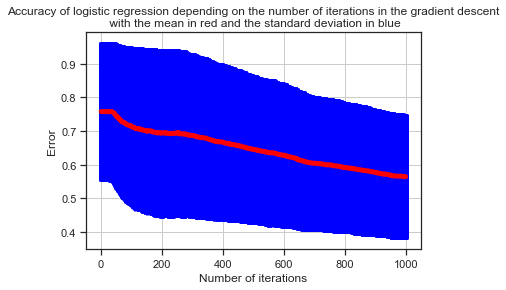

In [112]:
#plt.plot(n_iterations, mus)
plt.xlabel('Number of iterations')
plt.ylabel('Error')
#plt.xscale(value = 'log')
plt.errorbar(n_iterations, error, stds, color = 'red', ecolor = 'blue', linewidth = 5)
plt.grid()
plt.title('Accuracy of logistic regression depending on the number of iterations in the gradient descent\n with the mean in red and the standard deviation in blue')
plt.show()

Note that the mean of accuracy grows with the number of iterations. Note that its standard deviation shrinks. Also note that for this dataset a significant amount of iterations of the gradient descent algorithm is required to perform well.

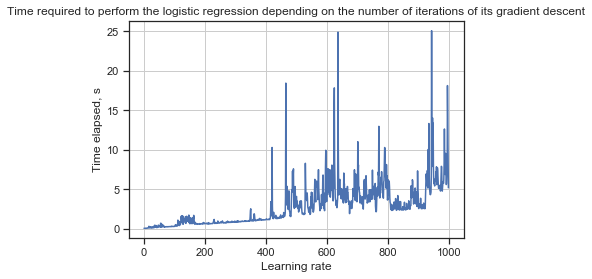

In [113]:
plt.plot(n_iterations, times)
plt.xlabel('Learning rate')
plt.ylabel('Time elapsed, s')
plt.grid()
plt.title('Time required to perform the logistic regression depending on the number of iterations of its gradient descent')
plt.show()

Note that the time grows linearly but the algorithm seems to overshoot often.

We can get the dependece of the error rate of both learning methods on the test/train split ratio. Firstly, the logistic regression is analyzied. Here the learning rate is set to $1$ for faster performance.

In [115]:
split_ratio = []
mus = []
stds = []

for i in range(1, 100):
    print('Logistic regression:')
    
    logistic_regression_accuracy = []
    
    split_ratio.append(i * 0.01)
    print('Train-to-test split ratio:', split_ratio[i - 1])
    
    # Splitting the dataset into folds:
    for k in range(5):
        msk = np.random.rand(len(chess_num)) < split_ratio[i - 1]
        train = chess_num[msk]
        test = chess_num[~msk]
        
        # Train dataset:
        X_train = train.iloc[:, :-1] # feature values
        y_train = train.iloc[:, -1] # target values
        
        # Test dataset:
        X_test = test.iloc[:, :-1] # feature values
        y_test = test.iloc[:, -1] # target values
        
        # Logistic regression
        
        LR = Logistic_Regression(lr = 1)
        w = LR.fit(X_train, y_train)
        pred = LR.predict(X_test, w)
        logistic_regression_accuracy.append(LR.evaluate_acc(pred, y_test))
        
        print('----------------------------------------')
        
    mu_LR = np.mean(logistic_regression_accuracy)
    std_LR = np.std(logistic_regression_accuracy)
    
    print('Logistic regression mean:', mu_LR)
    print('Logistic regression standard deviation:', std_LR)
    
    mus.append(mu_LR)
    stds.append(std_LR)

Logistic regression:
Train-to-test split ratio: 0.01
Number of iterations of the gradient descent: 376
Correct classifications: 2493
Incorrect classifications: 673
Accuracy of the logistic regression: 0.7874289324068224
----------------------------------------
Number of iterations of the gradient descent: 172
Correct classifications: 2360
Incorrect classifications: 811
Accuracy of the logistic regression: 0.7442447177546515
----------------------------------------
Number of iterations of the gradient descent: 208
Correct classifications: 2414
Incorrect classifications: 759
Accuracy of the logistic regression: 0.7607942010715412
----------------------------------------
Number of iterations of the gradient descent: 171
Correct classifications: 2407
Incorrect classifications: 756
Accuracy of the logistic regression: 0.7609864053114133
----------------------------------------
Number of iterations of the gradient descent: 288
Correct classifications: 2542
Incorrect classifications: 615
Accu

Correct classifications: 2674
Incorrect classifications: 243
Accuracy of the logistic regression: 0.9166952348303051
----------------------------------------
Number of iterations of the gradient descent: 359
Correct classifications: 2688
Incorrect classifications: 232
Accuracy of the logistic regression: 0.9205479452054794
----------------------------------------
Number of iterations of the gradient descent: 450
Correct classifications: 2724
Incorrect classifications: 206
Accuracy of the logistic regression: 0.9296928327645051
----------------------------------------
Number of iterations of the gradient descent: 628
Correct classifications: 2745
Incorrect classifications: 195
Accuracy of the logistic regression: 0.9336734693877551
----------------------------------------
Number of iterations of the gradient descent: 632
Correct classifications: 2762
Incorrect classifications: 193
Accuracy of the logistic regression: 0.9346869712351946
----------------------------------------
Logistic r

Number of iterations of the gradient descent: 492
Correct classifications: 2533
Incorrect classifications: 178
Accuracy of the logistic regression: 0.934341571375876
----------------------------------------
Number of iterations of the gradient descent: 554
Correct classifications: 2583
Incorrect classifications: 159
Accuracy of the logistic regression: 0.9420131291028446
----------------------------------------
Number of iterations of the gradient descent: 482
Correct classifications: 2586
Incorrect classifications: 154
Accuracy of the logistic regression: 0.9437956204379562
----------------------------------------
Number of iterations of the gradient descent: 460
Correct classifications: 2575
Incorrect classifications: 145
Accuracy of the logistic regression: 0.9466911764705882
----------------------------------------
Number of iterations of the gradient descent: 410
Correct classifications: 2534
Incorrect classifications: 170
Accuracy of the logistic regression: 0.9371301775147929
--

Number of iterations of the gradient descent: 444
Correct classifications: 2372
Incorrect classifications: 139
Accuracy of the logistic regression: 0.9446435682994823
----------------------------------------
Number of iterations of the gradient descent: 422
Correct classifications: 2340
Incorrect classifications: 148
Accuracy of the logistic regression: 0.9405144694533762
----------------------------------------
Number of iterations of the gradient descent: 378
Correct classifications: 2360
Incorrect classifications: 154
Accuracy of the logistic regression: 0.9387430389817024
----------------------------------------
Number of iterations of the gradient descent: 337
Correct classifications: 2351
Incorrect classifications: 148
Accuracy of the logistic regression: 0.9407763105242097
----------------------------------------
Number of iterations of the gradient descent: 510
Correct classifications: 2320
Incorrect classifications: 144
Accuracy of the logistic regression: 0.9415584415584416
-

Number of iterations of the gradient descent: 541
Correct classifications: 2132
Incorrect classifications: 127
Accuracy of the logistic regression: 0.9437804338202744
----------------------------------------
Number of iterations of the gradient descent: 432
Correct classifications: 2083
Incorrect classifications: 135
Accuracy of the logistic regression: 0.9391343552750225
----------------------------------------
Number of iterations of the gradient descent: 548
Correct classifications: 2150
Incorrect classifications: 110
Accuracy of the logistic regression: 0.9513274336283186
----------------------------------------
Number of iterations of the gradient descent: 456
Correct classifications: 2125
Incorrect classifications: 130
Accuracy of the logistic regression: 0.9423503325942351
----------------------------------------
Number of iterations of the gradient descent: 359
Correct classifications: 2105
Incorrect classifications: 156
Accuracy of the logistic regression: 0.9310039805395842
-

Number of iterations of the gradient descent: 616
Correct classifications: 1970
Incorrect classifications: 119
Accuracy of the logistic regression: 0.9430349449497367
----------------------------------------
Number of iterations of the gradient descent: 475
Correct classifications: 1906
Incorrect classifications: 124
Accuracy of the logistic regression: 0.9389162561576355
----------------------------------------
Number of iterations of the gradient descent: 377
Correct classifications: 1935
Incorrect classifications: 125
Accuracy of the logistic regression: 0.9393203883495146
----------------------------------------
Number of iterations of the gradient descent: 476
Correct classifications: 1964
Incorrect classifications: 119
Accuracy of the logistic regression: 0.942870859337494
----------------------------------------
Number of iterations of the gradient descent: 586
Correct classifications: 1877
Incorrect classifications: 114
Accuracy of the logistic regression: 0.9427423405323958
--

Number of iterations of the gradient descent: 393
Correct classifications: 1695
Incorrect classifications: 107
Accuracy of the logistic regression: 0.9406215316315205
----------------------------------------
Number of iterations of the gradient descent: 531
Correct classifications: 1719
Incorrect classifications: 89
Accuracy of the logistic regression: 0.9507743362831859
----------------------------------------
Number of iterations of the gradient descent: 386
Correct classifications: 1675
Incorrect classifications: 105
Accuracy of the logistic regression: 0.9410112359550562
----------------------------------------
Number of iterations of the gradient descent: 498
Correct classifications: 1706
Incorrect classifications: 95
Accuracy of the logistic regression: 0.9472515269294837
----------------------------------------
Number of iterations of the gradient descent: 515
Correct classifications: 1711
Incorrect classifications: 108
Accuracy of the logistic regression: 0.9406267179769104
---

Number of iterations of the gradient descent: 585
Correct classifications: 1462
Incorrect classifications: 85
Accuracy of the logistic regression: 0.945054945054945
----------------------------------------
Number of iterations of the gradient descent: 401
Correct classifications: 1494
Incorrect classifications: 97
Accuracy of the logistic regression: 0.9390320553111251
----------------------------------------
Number of iterations of the gradient descent: 374
Correct classifications: 1497
Incorrect classifications: 99
Accuracy of the logistic regression: 0.9379699248120301
----------------------------------------
Number of iterations of the gradient descent: 487
Correct classifications: 1537
Incorrect classifications: 85
Accuracy of the logistic regression: 0.9475955610357584
----------------------------------------
Number of iterations of the gradient descent: 470
Correct classifications: 1518
Incorrect classifications: 87
Accuracy of the logistic regression: 0.9457943925233645
-------

Number of iterations of the gradient descent: 492
Correct classifications: 1267
Incorrect classifications: 69
Accuracy of the logistic regression: 0.9483532934131736
----------------------------------------
Number of iterations of the gradient descent: 488
Correct classifications: 1280
Incorrect classifications: 80
Accuracy of the logistic regression: 0.9411764705882353
----------------------------------------
Number of iterations of the gradient descent: 375
Correct classifications: 1318
Incorrect classifications: 75
Accuracy of the logistic regression: 0.9461593682699211
----------------------------------------
Number of iterations of the gradient descent: 463
Correct classifications: 1342
Incorrect classifications: 70
Accuracy of the logistic regression: 0.9504249291784702
----------------------------------------
Number of iterations of the gradient descent: 557
Correct classifications: 1284
Incorrect classifications: 68
Accuracy of the logistic regression: 0.9497041420118343
------

Number of iterations of the gradient descent: 488
Correct classifications: 1127
Incorrect classifications: 70
Accuracy of the logistic regression: 0.9415204678362573
----------------------------------------
Number of iterations of the gradient descent: 536
Correct classifications: 1107
Incorrect classifications: 73
Accuracy of the logistic regression: 0.938135593220339
----------------------------------------
Number of iterations of the gradient descent: 497
Correct classifications: 1093
Incorrect classifications: 73
Accuracy of the logistic regression: 0.9373927958833619
----------------------------------------
Number of iterations of the gradient descent: 465
Correct classifications: 1055
Incorrect classifications: 55
Accuracy of the logistic regression: 0.9504504504504504
----------------------------------------
Number of iterations of the gradient descent: 516
Correct classifications: 1105
Incorrect classifications: 61
Accuracy of the logistic regression: 0.9476843910806175
-------

Number of iterations of the gradient descent: 532
Correct classifications: 883
Incorrect classifications: 56
Accuracy of the logistic regression: 0.9403620873269436
----------------------------------------
Number of iterations of the gradient descent: 489
Correct classifications: 852
Incorrect classifications: 35
Accuracy of the logistic regression: 0.9605411499436303
----------------------------------------
Number of iterations of the gradient descent: 560
Correct classifications: 861
Incorrect classifications: 47
Accuracy of the logistic regression: 0.948237885462555
----------------------------------------
Number of iterations of the gradient descent: 525
Correct classifications: 842
Incorrect classifications: 58
Accuracy of the logistic regression: 0.9355555555555556
----------------------------------------
Number of iterations of the gradient descent: 549
Correct classifications: 852
Incorrect classifications: 50
Accuracy of the logistic regression: 0.9445676274944568
------------

Number of iterations of the gradient descent: 536
Correct classifications: 687
Incorrect classifications: 39
Accuracy of the logistic regression: 0.9462809917355371
----------------------------------------
Number of iterations of the gradient descent: 518
Correct classifications: 680
Incorrect classifications: 37
Accuracy of the logistic regression: 0.9483960948396095
----------------------------------------
Number of iterations of the gradient descent: 511
Correct classifications: 674
Incorrect classifications: 33
Accuracy of the logistic regression: 0.9533239038189534
----------------------------------------
Number of iterations of the gradient descent: 534
Correct classifications: 698
Incorrect classifications: 34
Accuracy of the logistic regression: 0.953551912568306
----------------------------------------
Number of iterations of the gradient descent: 566
Correct classifications: 674
Incorrect classifications: 35
Accuracy of the logistic regression: 0.9506346967559943
------------

Number of iterations of the gradient descent: 614
Correct classifications: 451
Incorrect classifications: 36
Accuracy of the logistic regression: 0.9260780287474333
----------------------------------------
Number of iterations of the gradient descent: 565
Correct classifications: 416
Incorrect classifications: 30
Accuracy of the logistic regression: 0.9327354260089686
----------------------------------------
Number of iterations of the gradient descent: 524
Correct classifications: 411
Incorrect classifications: 18
Accuracy of the logistic regression: 0.958041958041958
----------------------------------------
Number of iterations of the gradient descent: 533
Correct classifications: 446
Incorrect classifications: 19
Accuracy of the logistic regression: 0.9591397849462365
----------------------------------------
Number of iterations of the gradient descent: 522
Correct classifications: 448
Incorrect classifications: 33
Accuracy of the logistic regression: 0.9313929313929314
------------

Number of iterations of the gradient descent: 532
Correct classifications: 220
Incorrect classifications: 10
Accuracy of the logistic regression: 0.9565217391304348
----------------------------------------
Number of iterations of the gradient descent: 542
Correct classifications: 259
Incorrect classifications: 13
Accuracy of the logistic regression: 0.9522058823529411
----------------------------------------
Number of iterations of the gradient descent: 516
Correct classifications: 251
Incorrect classifications: 12
Accuracy of the logistic regression: 0.9543726235741445
----------------------------------------
Number of iterations of the gradient descent: 564
Correct classifications: 235
Incorrect classifications: 13
Accuracy of the logistic regression: 0.9475806451612904
----------------------------------------
Number of iterations of the gradient descent: 517
Correct classifications: 234
Incorrect classifications: 16
Accuracy of the logistic regression: 0.936
------------------------

Number of iterations of the gradient descent: 556
Correct classifications: 37
Incorrect classifications: 0
Accuracy of the logistic regression: 1.0
----------------------------------------
Number of iterations of the gradient descent: 552
Correct classifications: 22
Incorrect classifications: 3
Accuracy of the logistic regression: 0.88
----------------------------------------
Number of iterations of the gradient descent: 547
Correct classifications: 45
Incorrect classifications: 1
Accuracy of the logistic regression: 0.9782608695652174
----------------------------------------
Number of iterations of the gradient descent: 551
Correct classifications: 25
Incorrect classifications: 2
Accuracy of the logistic regression: 0.9259259259259259
----------------------------------------
Number of iterations of the gradient descent: 552
Correct classifications: 30
Incorrect classifications: 2
Accuracy of the logistic regression: 0.9375
----------------------------------------
Logistic regression m

Similarly, we obtain the error as $error = 1 - \mu$.

In [116]:
error = []
for m in mus:
    error.append(1 - m)

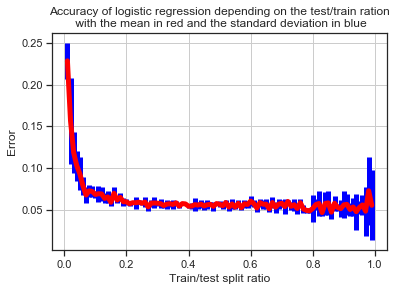

In [117]:
#plt.plot(n_iterations, mus)
plt.xlabel('Train/test split ratio')
plt.ylabel('Error')
#plt.xscale(value = 'log')
plt.errorbar(split_ratio, error, stds, color = 'red', ecolor = 'blue', linewidth = 5)
plt.grid()
plt.title('Accuracy of logistic regression depending on the test/train ration\n with the mean in red and the standard deviation in blue')
plt.show()

Note that the error assymptotically goes down when we use more data for trainging until the very end where the test data becomes insufficient.

Now the Categorical Naive Bayes can be analyzed. Note that low train/test ratios are not considered due to errors appearing in categorical naive Bayes.

In [64]:
split_ratio = []
mus = []
stds = []

for i in range(5, 100):
    print('Gaussian Naive Bayes:')
    
    naive_bayes_accuracy = []
    
    split_ratio.append(i * 0.01)
    print('Train-to-test split ratio:', split_ratio[i - 5])
    
    # Splitting the dataset into folds:
    for k in range(5):
        msk = np.random.rand(len(chess_num)) < split_ratio[i - 5]
        train = chess_num[msk]
        test = chess_num[~msk]
        
        # Train dataset:
        X_train = train.iloc[:, :-1] # feature values
        y_train = train.iloc[:, -1] # target values
        
        # Test dataset:
        X_test = test.iloc[:, :-1] # feature values
        y_test = test.iloc[:, -1] # target values
        
        # Naive Bayes
        print('Naive Bayes')
        CNB = CategoricalNaiveBayes()
        priors = CNB.fit(X_train, y_train)
        pred = CNB.predict(X_test, priors)
        naive_bayes_accuracy.append(CNB.evaluate_acc(pred, y_test))
        print('----------------------------------------')
        
    mu_NB = np.mean(naive_bayes_accuracy)
    std_NB = np.std(naive_bayes_accuracy)
    
    print('Naive Bayes mean:', mu_NB)
    print('Naive Bayes standard deviation:', std_NB)
    
    mus.append(mu_NB)
    stds.append(std_NB)

Gaussian Naive Bayes:
Train-to-test split ratio: 0.05
Naive Bayes
Correct classifications: 2543
Incorrect classifications: 502
Accuracy of the naive Bayes: 0.8351395730706076
----------------------------------------
Naive Bayes
Correct classifications: 2399
Incorrect classifications: 638
Accuracy of the naive Bayes: 0.7899242673691143
----------------------------------------
Naive Bayes
Correct classifications: 2402
Incorrect classifications: 605
Accuracy of the naive Bayes: 0.7988027934818757
----------------------------------------
Naive Bayes
Correct classifications: 2517
Incorrect classifications: 508
Accuracy of the naive Bayes: 0.8320661157024793
----------------------------------------
Naive Bayes
Correct classifications: 2388
Incorrect classifications: 667
Accuracy of the naive Bayes: 0.7816693944353519
----------------------------------------
Naive Bayes mean: 0.8075204288118858
Naive Bayes standard deviation: 0.02199639023166756
Gaussian Naive Bayes:
Train-to-test split ratio

Correct classifications: 2436
Incorrect classifications: 309
Accuracy of the naive Bayes: 0.8874316939890711
----------------------------------------
Naive Bayes
Correct classifications: 2398
Incorrect classifications: 344
Accuracy of the naive Bayes: 0.8745441283734501
----------------------------------------
Naive Bayes
Correct classifications: 2354
Incorrect classifications: 420
Accuracy of the naive Bayes: 0.8485940879596251
----------------------------------------
Naive Bayes
Correct classifications: 2283
Incorrect classifications: 455
Accuracy of the naive Bayes: 0.8338203067932798
----------------------------------------
Naive Bayes mean: 0.8627848016449862
Naive Bayes standard deviation: 0.01913958329240363
Gaussian Naive Bayes:
Train-to-test split ratio: 0.15
Naive Bayes
Correct classifications: 2375
Incorrect classifications: 374
Accuracy of the naive Bayes: 0.8639505274645326
----------------------------------------
Naive Bayes
Correct classifications: 2269
Incorrect classif

Correct classifications: 2146
Incorrect classifications: 326
Accuracy of the naive Bayes: 0.8681229773462783
----------------------------------------
Naive Bayes
Correct classifications: 2057
Incorrect classifications: 399
Accuracy of the naive Bayes: 0.8375407166123778
----------------------------------------
Naive Bayes
Correct classifications: 2003
Incorrect classifications: 423
Accuracy of the naive Bayes: 0.825638911788953
----------------------------------------
Naive Bayes mean: 0.8482345840261374
Naive Bayes standard deviation: 0.01507809671826736
Gaussian Naive Bayes:
Train-to-test split ratio: 0.24
Naive Bayes
Correct classifications: 2086
Incorrect classifications: 333
Accuracy of the naive Bayes: 0.8623398098387763
----------------------------------------
Naive Bayes
Correct classifications: 2156
Incorrect classifications: 305
Accuracy of the naive Bayes: 0.8760666395774076
----------------------------------------
Naive Bayes
Correct classifications: 2122
Incorrect classifi

Naive Bayes
Correct classifications: 1833
Incorrect classifications: 316
Accuracy of the naive Bayes: 0.8529548627268497
----------------------------------------
Naive Bayes
Correct classifications: 1817
Incorrect classifications: 330
Accuracy of the naive Bayes: 0.8462971588262692
----------------------------------------
Naive Bayes
Correct classifications: 1836
Incorrect classifications: 346
Accuracy of the naive Bayes: 0.8414298808432631
----------------------------------------
Naive Bayes
Correct classifications: 1895
Incorrect classifications: 256
Accuracy of the naive Bayes: 0.8809855880985588
----------------------------------------
Naive Bayes mean: 0.8561670600560068
Naive Bayes standard deviation: 0.013783188645957786
Gaussian Naive Bayes:
Train-to-test split ratio: 0.33
Naive Bayes
Correct classifications: 1816
Incorrect classifications: 284
Accuracy of the naive Bayes: 0.8647619047619047
----------------------------------------
Naive Bayes
Correct classifications: 1874
Inco

Correct classifications: 1629
Incorrect classifications: 247
Accuracy of the naive Bayes: 0.8683368869936035
----------------------------------------
Naive Bayes
Correct classifications: 1626
Incorrect classifications: 291
Accuracy of the naive Bayes: 0.8482003129890454
----------------------------------------
Naive Bayes
Correct classifications: 1570
Incorrect classifications: 299
Accuracy of the naive Bayes: 0.8400214018191546
----------------------------------------
Naive Bayes
Correct classifications: 1587
Incorrect classifications: 317
Accuracy of the naive Bayes: 0.8335084033613446
----------------------------------------
Naive Bayes mean: 0.8508720181636926
Naive Bayes standard deviation: 0.013501967993308071
Gaussian Naive Bayes:
Train-to-test split ratio: 0.42
Naive Bayes
Correct classifications: 1581
Incorrect classifications: 260
Accuracy of the naive Bayes: 0.8587724063009234
----------------------------------------
Naive Bayes
Correct classifications: 1573
Incorrect classi

Correct classifications: 1342
Incorrect classifications: 252
Accuracy of the naive Bayes: 0.8419071518193224
----------------------------------------
Naive Bayes
Correct classifications: 1407
Incorrect classifications: 214
Accuracy of the naive Bayes: 0.8679827267119062
----------------------------------------
Naive Bayes
Correct classifications: 1305
Incorrect classifications: 245
Accuracy of the naive Bayes: 0.8419354838709677
----------------------------------------
Naive Bayes
Correct classifications: 1356
Incorrect classifications: 237
Accuracy of the naive Bayes: 0.8512241054613936
----------------------------------------
Naive Bayes
Correct classifications: 1332
Incorrect classifications: 246
Accuracy of the naive Bayes: 0.844106463878327
----------------------------------------
Naive Bayes mean: 0.8494311863483833
Naive Bayes standard deviation: 0.009884569079254548
Gaussian Naive Bayes:
Train-to-test split ratio: 0.51
Naive Bayes
Correct classifications: 1296
Incorrect classif

Correct classifications: 1152
Incorrect classifications: 224
Accuracy of the naive Bayes: 0.8372093023255814
----------------------------------------
Naive Bayes mean: 0.8622078732308678
Naive Bayes standard deviation: 0.014525174437950386
Gaussian Naive Bayes:
Train-to-test split ratio: 0.59
Naive Bayes
Correct classifications: 1063
Incorrect classifications: 174
Accuracy of the naive Bayes: 0.8593371059013742
----------------------------------------
Naive Bayes
Correct classifications: 1128
Incorrect classifications: 188
Accuracy of the naive Bayes: 0.8571428571428571
----------------------------------------
Naive Bayes
Correct classifications: 1134
Incorrect classifications: 164
Accuracy of the naive Bayes: 0.8736517719568567
----------------------------------------
Naive Bayes
Correct classifications: 1098
Incorrect classifications: 179
Accuracy of the naive Bayes: 0.8598277212216131
----------------------------------------
Naive Bayes
Correct classifications: 1145
Incorrect classi

Correct classifications: 905
Incorrect classifications: 180
Accuracy of the naive Bayes: 0.8341013824884793
----------------------------------------
Naive Bayes
Correct classifications: 938
Incorrect classifications: 151
Accuracy of the naive Bayes: 0.8613406795224977
----------------------------------------
Naive Bayes mean: 0.8531849099493624
Naive Bayes standard deviation: 0.012691820581155996
Gaussian Naive Bayes:
Train-to-test split ratio: 0.68
Naive Bayes
Correct classifications: 904
Incorrect classifications: 137
Accuracy of the naive Bayes: 0.8683957732949087
----------------------------------------
Naive Bayes
Correct classifications: 887
Incorrect classifications: 163
Accuracy of the naive Bayes: 0.8447619047619047
----------------------------------------
Naive Bayes
Correct classifications: 855
Incorrect classifications: 126
Accuracy of the naive Bayes: 0.8715596330275229
----------------------------------------
Naive Bayes
Correct classifications: 872
Incorrect classificati

Correct classifications: 632
Incorrect classifications: 97
Accuracy of the naive Bayes: 0.8669410150891632
----------------------------------------
Naive Bayes
Correct classifications: 665
Incorrect classifications: 102
Accuracy of the naive Bayes: 0.8670143415906127
----------------------------------------
Naive Bayes
Correct classifications: 678
Incorrect classifications: 90
Accuracy of the naive Bayes: 0.8828125
----------------------------------------
Naive Bayes
Correct classifications: 671
Incorrect classifications: 108
Accuracy of the naive Bayes: 0.8613607188703466
----------------------------------------
Naive Bayes mean: 0.8642973943080194
Naive Bayes standard deviation: 0.01268262894943629
Gaussian Naive Bayes:
Train-to-test split ratio: 0.77
Naive Bayes
Correct classifications: 594
Incorrect classifications: 117
Accuracy of the naive Bayes: 0.8354430379746836
----------------------------------------
Naive Bayes
Correct classifications: 612
Incorrect classifications: 102
Acc

Correct classifications: 401
Incorrect classifications: 78
Accuracy of the naive Bayes: 0.837160751565762
----------------------------------------
Naive Bayes mean: 0.8456939234700329
Naive Bayes standard deviation: 0.00865807957618772
Gaussian Naive Bayes:
Train-to-test split ratio: 0.86
Naive Bayes
Correct classifications: 388
Incorrect classifications: 77
Accuracy of the naive Bayes: 0.8344086021505376
----------------------------------------
Naive Bayes
Correct classifications: 379
Incorrect classifications: 82
Accuracy of the naive Bayes: 0.8221258134490239
----------------------------------------
Naive Bayes
Correct classifications: 397
Incorrect classifications: 61
Accuracy of the naive Bayes: 0.8668122270742358
----------------------------------------
Naive Bayes
Correct classifications: 381
Incorrect classifications: 61
Accuracy of the naive Bayes: 0.8619909502262444
----------------------------------------
Naive Bayes
Correct classifications: 365
Incorrect classifications: 54

Correct classifications: 133
Incorrect classifications: 15
Accuracy of the naive Bayes: 0.8986486486486487
----------------------------------------
Naive Bayes
Correct classifications: 138
Incorrect classifications: 13
Accuracy of the naive Bayes: 0.9139072847682119
----------------------------------------
Naive Bayes
Correct classifications: 126
Incorrect classifications: 25
Accuracy of the naive Bayes: 0.8344370860927153
----------------------------------------
Naive Bayes mean: 0.8596470906811442
Naive Bayes standard deviation: 0.04005500367640625
Gaussian Naive Bayes:
Train-to-test split ratio: 0.96
Naive Bayes
Correct classifications: 123
Incorrect classifications: 18
Accuracy of the naive Bayes: 0.8723404255319149
----------------------------------------
Naive Bayes
Correct classifications: 103
Incorrect classifications: 17
Accuracy of the naive Bayes: 0.8583333333333333
----------------------------------------
Naive Bayes
Correct classifications: 114
Incorrect classifications: 1

In [65]:
error = []
for m in mus:
    error.append(1 - m)

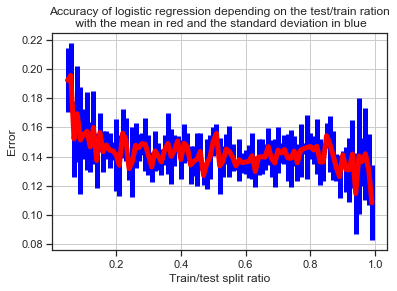

In [66]:
#plt.plot(n_iterations, mus)
plt.xlabel('Train/test split ratio')
plt.ylabel('Error')
#plt.xscale(value = 'log')
plt.errorbar(split_ratio, error, stds, color = 'red', ecolor = 'blue', linewidth = 5)
plt.grid()
plt.title('Accuracy of logistic regression depending on the test/train ration\n with the mean in red and the standard deviation in blue')
plt.show()

Note that the error assymptotically goes down when we use more data for trainging until the very end where the test data becomes insufficient. Naive Bayes seems to arrive to the error of ~$0.14$ faster that logistic regression. However, logistic regression shows significantly better results by approaching the error of ~$0.05$.